In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec, rc
import numpy as np
import scipy.constants as const
import pandas as pd
from itertools import chain
from functools import reduce

In [3]:
plt.rcParams['savefig.facecolor']='white'

/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_15320/1538553904.py:191: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  a1.plot(tOpticalPump, [0.95 for x in tOpticalPump], 'b', label='$95 \%$ threshold', color='red',  linestyle='dashed')
/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_15320/1538553904.py:192: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  a1.plot(tOpticalPump, [x for x in psi0_superposition], 'b', label='$|- \\rangle$', color='black')
/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_15320/1538553904.py:193: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  a1.plot(tOpti

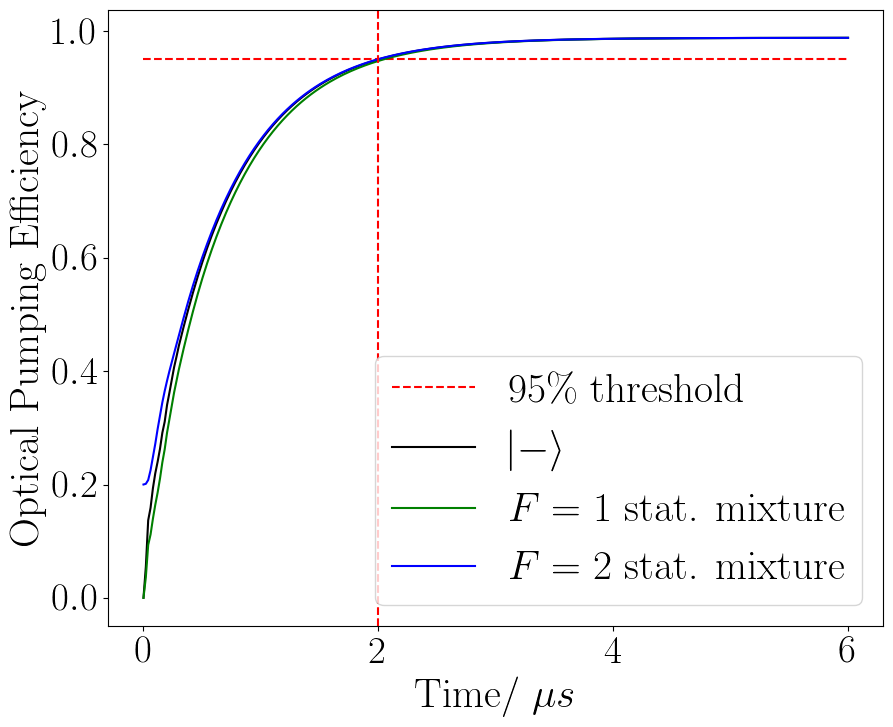

In [6]:
#optical pumping d2 data at small timesteps and various initial states
psi0_superposition=[0, 0.05463964, 0.13688006, 0.15882312, 0.19327709,
       0.21969621, 0.24004574, 0.26273891, 0.29114684, 0.31071943,
       0.34026091, 0.36188362, 0.38495778, 0.40707048, 0.42532604,
       0.44446699, 0.4612277 , 0.47755796, 0.49353653, 0.50880647,
       0.52377972, 0.53854328, 0.5526209 , 0.56650542, 0.57980163,
       0.59262259, 0.60506134, 0.61696806, 0.62852661, 0.6396798 ,
       0.65046903, 0.66093658, 0.67107002, 0.68089199, 0.69041629,
       0.69963506, 0.70856961, 0.71722092, 0.72559666, 0.73371146,
       0.74156847, 0.74918079, 0.75655588, 0.76370115, 0.77062553,
       0.77733517, 0.78383697, 0.79013769, 0.79624304, 0.80215939,
       0.80789257, 0.8134482 , 0.81883208, 0.82404946, 0.82910568,
       0.83400581, 0.83875467, 0.84335704, 0.84781744, 0.85214027,
       0.85632981, 0.86039016, 0.86432533, 0.86813921, 0.87183553,
       0.87541795, 0.87888999, 0.88225507, 0.88551648, 0.88867743,
       0.89174103, 0.89471027, 0.89758808, 0.90037726, 0.90308055,
       0.9057006 , 0.90823998, 0.91070118, 0.91308659, 0.91539857,
       0.91763937, 0.91981119, 0.92191614, 0.9239563 , 0.92593365,
       0.92785013, 0.92970761, 0.93150792, 0.93325281, 0.93494399,
       0.93658312, 0.93817178, 0.93971155, 0.94120393, 0.94265036,
       0.94405228, 0.94541104, 0.94672798, 0.94800439, 0.9492415 ,
       0.95044054, 0.95160268, 0.95272904, 0.95382074, 0.95487883,
       0.95590435, 0.95689832, 0.95786168, 0.9587954 , 0.95970038,
       0.9605775 , 0.96142763, 0.96225159, 0.96305018, 0.9638242 ,
       0.9645744 , 0.96530151, 0.96600623, 0.96668927, 0.96735128,
       0.96799292, 0.9686148 , 0.96921755, 0.96980175, 0.97036796,
       0.97091675, 0.97144864, 0.97196417, 0.97246383, 0.97294811,
       0.97341748, 0.97387241, 0.97431333, 0.97474068, 0.97515488,
       0.97555634, 0.97594543, 0.97632255, 0.97668806, 0.97704233,
       0.97738568, 0.97771848, 0.97804102, 0.97835364, 0.97865664,
       0.97895031, 0.97923495, 0.97951082, 0.9797782 , 0.98003735,
       0.98028853, 0.98053197, 0.98076793, 0.98099662, 0.98121827,
       0.9814331 , 0.98164131, 0.98184312, 0.98203872, 0.98222829,
       0.98241204, 0.98259012, 0.98276273, 0.98293002, 0.98309216,
       0.98324932, 0.98340163, 0.98354926, 0.98369234, 0.98383102,
       0.98396544, 0.98409571, 0.98422198, 0.98434435, 0.98446297,
       0.98457793, 0.98468935, 0.98479734, 0.98490201, 0.98500346,
       0.98510179, 0.98519709, 0.98528945, 0.98537898, 0.98546574,
       0.98554984, 0.98563135, 0.98571035, 0.98578692, 0.98586113,
       0.98593306, 0.98600277, 0.98607034, 0.98613583, 0.9861993 ,
       0.98626082, 0.98632045, 0.98637824, 0.98643425, 0.98648854,
       0.98654116, 0.98659215, 0.98664158, 0.98668949, 0.98673592,
       0.98678092, 0.98682454, 0.98686682, 0.98690779, 0.9869475 ,
       0.98698599, 0.9870233 , 0.98705946, 0.9870945 , 0.98712847,
       0.98716139, 0.9871933 , 0.98722422, 0.9872542 , 0.98728325,
       0.9873114 , 0.98733869, 0.98736514, 0.98739078, 0.98741563,
       0.98743971, 0.98746305, 0.98748567, 0.9875076 , 0.98752885,
       0.98754945, 0.98756941, 0.98758876, 0.98760752, 0.98762569,
       0.98764331, 0.98766038, 0.98767693, 0.98769297, 0.98770852,
       0.98772359, 0.98773819, 0.98775235, 0.98776606, 0.98777936,
       0.98779225, 0.98780474, 0.98781685, 0.98782858, 0.98783995,
       0.98785097, 0.98786166, 0.98787201, 0.98788205, 0.98789177,
       0.9879012 , 0.98791034, 0.98791919, 0.98792778, 0.9879361 ,
       0.98794416, 0.98795197, 0.98795955, 0.98796689, 0.98797401,
       0.9879809 , 0.98798759, 0.98799406, 0.98800034, 0.98800643,
       0.98801233, 0.98801804, 0.98802359, 0.98802896, 0.98803416,
       0.98803921, 0.98804409, 0.98804883, 0.98805343, 0.98805788,
       0.98806219, 0.98806638, 0.98807043, 0.98807436, 0.98807817,
       0.98808186, 0.98808543, 0.9880889 , 0.98809226, 0.98809552,
       0.98809867, 0.98810173, 0.9881047 , 0.98810757, 0.98811036,
       0.98811306, 0.98811567, 0.98811821, 0.98812067, 0.98812305]
psi0_f1= [0, 0.03653415, 0.09339838, 0.11171982, 0.13948377,
       0.16408175, 0.18567892, 0.21024325, 0.23885355, 0.26207544,
       0.29135949, 0.31524376, 0.33935887, 0.36243561, 0.38246503,
       0.40269965, 0.42109904, 0.43893888, 0.45636471, 0.47310165,
       0.48945051, 0.50543704, 0.52076016, 0.53572493, 0.55008871,
       0.56392571, 0.57731452, 0.59016815, 0.60261846, 0.61464069,
       0.62626805, 0.63753677, 0.64844293, 0.65900655, 0.66924068,
       0.67914466, 0.68873665, 0.69802199, 0.70701006, 0.7157149 ,
       0.72414285, 0.73230637, 0.74021414, 0.74787444, 0.7552964 ,
       0.76248712, 0.76945409, 0.77620458, 0.78274507, 0.78908241,
       0.795223  , 0.80117301, 0.80693864, 0.81252568, 0.81793981,
       0.82318652, 0.82827104, 0.83319848, 0.83797373, 0.84260153,
       0.84708649, 0.85143302, 0.85564545, 0.85972794, 0.86368452,
       0.86751911, 0.87123548, 0.87483731, 0.87832813, 0.88171139,
       0.8849904 , 0.8881684 , 0.8912485 , 0.89423373, 0.89712701,
       0.89993118, 0.90264899, 0.90528312, 0.90783613, 0.91031053,
       0.91270874, 0.91503312, 0.91728593, 0.91946939, 0.92158563,
       0.92363672, 0.92562467, 0.92755142, 0.92941886, 0.93122882,
       0.93298306, 0.9346833 , 0.93633121, 0.93792839, 0.93947641,
       0.94097679, 0.94243098, 0.94384041, 0.94520645, 0.94653046,
       0.94781371, 0.94905746, 0.95026293, 0.9514313 , 0.95256371,
       0.95366126, 0.95472503, 0.95575606, 0.95675536, 0.9577239 ,
       0.95866263, 0.95957247, 0.9604543 , 0.96130899, 0.96213738,
       0.96294027, 0.96371845, 0.96447268, 0.96520369, 0.96591221,
       0.96659892, 0.96726449, 0.96790958, 0.96853482, 0.96914081,
       0.96972815, 0.97029741, 0.97084915, 0.97138391, 0.97190221,
       0.97240456, 0.97289145, 0.97336335, 0.97382073, 0.97426403,
       0.97469369, 0.97511012, 0.97551374, 0.97590494, 0.97628409,
       0.97665158, 0.97700775, 0.97735296, 0.97768755, 0.97801184,
       0.97832615, 0.97863078, 0.97892604, 0.97921221, 0.97948958,
       0.9797584 , 0.98001896, 0.98027149, 0.98051625, 0.98075348,
       0.98098341, 0.98120626, 0.98142225, 0.98163159, 0.98183449,
       0.98203115, 0.98222175, 0.98240649, 0.98258554, 0.98275908,
       0.98292728, 0.9830903 , 0.98324831, 0.98340145, 0.98354988,
       0.98369374, 0.98383317, 0.98396831, 0.98409929, 0.98422624,
       0.98434928, 0.98446854, 0.98458413, 0.98469615, 0.98480473,
       0.98490997, 0.98501197, 0.98511083, 0.98520665, 0.98529952,
       0.98538953, 0.98547677, 0.98556132, 0.98564327, 0.9857227 ,
       0.98579969, 0.98587431, 0.98594662, 0.98601672, 0.98608465,
       0.9861505 , 0.98621432, 0.98627617, 0.98633612, 0.98639423,
       0.98645055, 0.98650513, 0.98655803, 0.98660931, 0.98665901,
       0.98670718, 0.98675386, 0.98679911, 0.98684297, 0.98688547,
       0.98692667, 0.9869666 , 0.9870053 , 0.98704281, 0.98707917,
       0.9871144 , 0.98714855, 0.98718165, 0.98721374, 0.98724483,
       0.98727497, 0.98730418, 0.98733249, 0.98735993, 0.98738652,
       0.9874123 , 0.98743728, 0.9874615 , 0.98748497, 0.98750771,
       0.98752976, 0.98755113, 0.98757184, 0.98759191, 0.98761137,
       0.98763022, 0.9876485 , 0.98766621, 0.98768338, 0.98770002,
       0.98771615, 0.98773178, 0.98774693, 0.98776162, 0.98777585,
       0.98778964, 0.98780301, 0.98781597, 0.98782853, 0.9878407 ,
       0.9878525 , 0.98786393, 0.98787502, 0.98788576, 0.98789617,
       0.98790626, 0.98791604, 0.98792552, 0.98793471, 0.98794361,
       0.98795224, 0.98796061, 0.98796872, 0.98797657, 0.98798419,
       0.98799157, 0.98799873, 0.98800566, 0.98801238, 0.9880189 ,
       0.98802521, 0.98803133, 0.98803726, 0.98804301, 0.98804858,
       0.98805398, 0.98805921, 0.98806429, 0.9880692 , 0.98807397,
       0.98807859, 0.98808306, 0.9880874 , 0.98809161, 0.98809568,
       0.98809963, 0.98810346, 0.98810717, 0.98811077, 0.98811426,
       0.98811763, 0.98812091, 0.98812408, 0.98812716, 0.98813014,
       0.98813303, 0.98813583, 0.98813855, 0.98814118, 0.98814373]
psi0_f2=[0.2, 0.20118896, 0.20791919, 0.22517878, 0.24810471,
       0.27162264, 0.29780796, 0.32185864, 0.3448073 , 0.36488653,
       0.38301591, 0.39996836, 0.4159452 , 0.43154796, 0.44711678,
       0.46265284, 0.47816798, 0.49353326, 0.50856079, 0.52323266,
       0.53739815, 0.55108464, 0.56429892, 0.57706574, 0.58944425,
       0.60145903, 0.61314177, 0.62451001, 0.63556709, 0.64631651,
       0.65675877, 0.66689209, 0.67672222, 0.68625301, 0.69549298,
       0.70445171, 0.71313812, 0.72156222, 0.72973239, 0.73765653,
       0.74534193, 0.75279507, 0.76002231, 0.76702985, 0.77382374,
       0.78041016, 0.78679519, 0.79298488, 0.79898519, 0.80480187,
       0.81044053, 0.81590658, 0.82120523, 0.82634153, 0.83132037,
       0.83614651, 0.84082455, 0.84535899, 0.84975419, 0.8540144 ,
       0.85814374, 0.86214622, 0.86602571, 0.86978597, 0.87343067,
       0.87696333, 0.88038739, 0.88370617, 0.8869229 , 0.8900407 ,
       0.89306262, 0.89599158, 0.89883046, 0.90158201, 0.90424892,
       0.90683378, 0.90933912, 0.91176737, 0.91412092, 0.91640206,
       0.918613  , 0.92075592, 0.92283289, 0.92484596, 0.92679708,
       0.92868816, 0.93052105, 0.93229753, 0.93401934, 0.93568817,
       0.93730564, 0.93887333, 0.94039278, 0.94186547, 0.94329283,
       0.94467627, 0.94601713, 0.94731673, 0.94857632, 0.94979716,
       0.95098042, 0.95212726, 0.95323881, 0.95431615, 0.95536034,
       0.95637239, 0.95735328, 0.958304  , 0.95922545, 0.96011854,
       0.96098415, 0.96182311, 0.96263626, 0.96342437, 0.96418824,
       0.96492859, 0.96564616, 0.96634164, 0.96701572, 0.96766905,
       0.96830228, 0.96891601, 0.96951086, 0.9700874 , 0.97064619,
       0.97118779, 0.97171272, 0.97222149, 0.97271461, 0.97319254,
       0.97365577, 0.97410474, 0.9745399 , 0.97496166, 0.97537044,
       0.97576663, 0.97615064, 0.97652283, 0.97688356, 0.97723319,
       0.97757206, 0.9779005 , 0.97821883, 0.97852736, 0.9788264 ,
       0.97911623, 0.97939715, 0.97966941, 0.9799333 , 0.98018907,
       0.98043697, 0.98067723, 0.9809101 , 0.98113581, 0.98135456,
       0.98156659, 0.98177209, 0.98197126, 0.98216431, 0.98235141,
       0.98253275, 0.98270852, 0.98287887, 0.98304398, 0.98320401,
       0.98335912, 0.98350945, 0.98365515, 0.98379637, 0.98393324,
       0.9840659 , 0.98419448, 0.9843191 , 0.98443989, 0.98455695,
       0.98467042, 0.98478039, 0.98488698, 0.98499029, 0.98509041,
       0.98518746, 0.98528152, 0.98537268, 0.98546104, 0.98554668,
       0.98562968, 0.98571013, 0.98578811, 0.98586368, 0.98593693,
       0.98600792, 0.98607673, 0.98614342, 0.98620805, 0.9862707 ,
       0.98633142, 0.98639027, 0.98644731, 0.9865026 , 0.98655618,
       0.98660812, 0.98665845, 0.98670724, 0.98675452, 0.98680035,
       0.98684477, 0.98688782, 0.98692955, 0.98696999, 0.98700919,
       0.98704718, 0.98708401, 0.98711969, 0.98715429, 0.98718781,
       0.98722031, 0.9872518 , 0.98728232, 0.98731191, 0.98734059,
       0.98736838, 0.98739531, 0.98742142, 0.98744673, 0.98747125,
       0.98749502, 0.98751806, 0.98754039, 0.98756203, 0.98758301,
       0.98760334, 0.98762305, 0.98764215, 0.98766066, 0.9876786 ,
       0.98769599, 0.98771284, 0.98772918, 0.98774501, 0.98776036,
       0.98777523, 0.98778964, 0.98780362, 0.98781716, 0.98783028,
       0.987843  , 0.98785533, 0.98786728, 0.98787886, 0.98789009,
       0.98790097, 0.98791152, 0.98792174, 0.98793164, 0.98794124,
       0.98795055, 0.98795957, 0.98796831, 0.98797678, 0.98798499,
       0.98799295, 0.98800067, 0.98800815, 0.98801539, 0.98802242,
       0.98802922, 0.98803582, 0.98804222, 0.98804841, 0.98805442,
       0.98806024, 0.98806589, 0.98807136, 0.98807666, 0.9880818 ,
       0.98808678, 0.9880916 , 0.98809628, 0.98810082, 0.98810521,
       0.98810947, 0.9881136 , 0.9881176 , 0.98812148, 0.98812524,
       0.98812888, 0.98813241, 0.98813583, 0.98813915, 0.98814236,
       0.98814548, 0.9881485 , 0.98815143, 0.98815426, 0.98815701,
       0.98815968, 0.98816226, 0.98816476, 0.98816719, 0.98816954]

# Plot the results
tOpticalPump, tOpticalPumpStep = np.linspace(0, 6, 300, retstep=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


f, (a1) = plt.subplots(1, 1, sharex=True, figsize=(10, 8))
a1.plot(tOpticalPump, [0.95 for x in tOpticalPump], 'b', label='$95 \%$ threshold', color='red',  linestyle='dashed')
a1.plot(tOpticalPump, [x for x in psi0_superposition], 'b', label='$|- \\rangle$', color='black')
a1.plot(tOpticalPump, [x for x in psi0_f1], 'b', label='$F=1$ stat. mixture', color='green')
a1.plot(tOpticalPump, [x for x in psi0_f2], 'b', label='$F=2$ stat. mixture', color='blue')
a1.axvline(x=2, color='red', linestyle='dashed')
a1.tick_params(axis='both', which='major', labelsize=28)
a1.legend(loc = 'lower right', fontsize=30)
a1.set_ylabel('Optical Pumping Efficiency', fontsize=30)
a1.set_xlabel('Time/ $\mu s$', fontsize=30)
f.savefig('pdf_files/optical-pumping-d2.pdf')

/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_15320/3559108113.py:190: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  a1.plot(tOpticalPump, [0.95 for x in tOpticalPump], 'b', label='$95 \%$ threshold', color='red',  linestyle='dashed')
/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_15320/3559108113.py:191: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  a1.plot(tOpticalPump, [x for x in psi0_superposition], 'b', label='$|- \\rangle$', color='black')
/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_15320/3559108113.py:192: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  a1.plot(tOpti

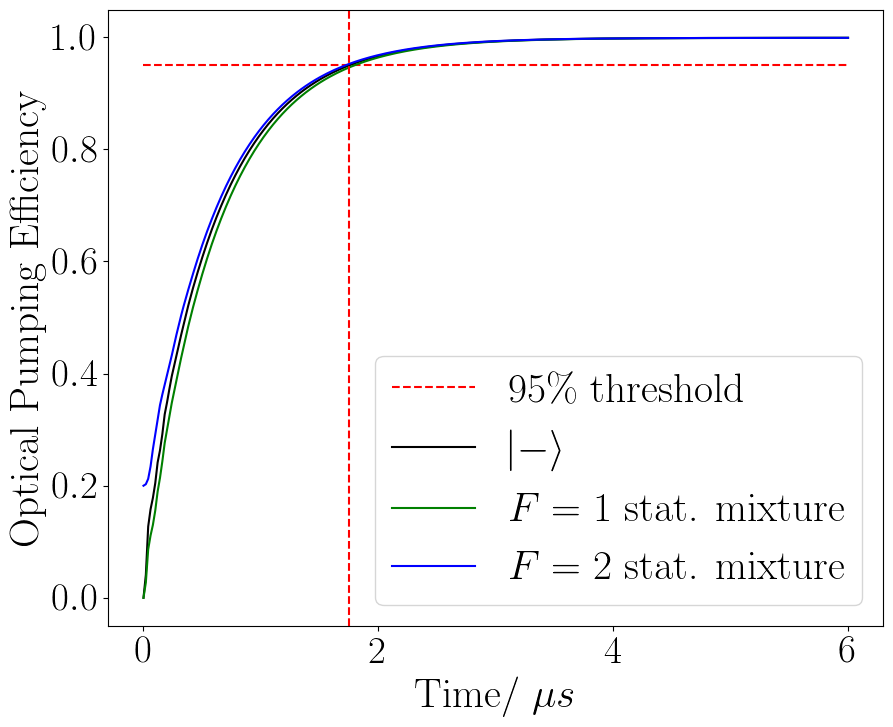

In [7]:
#plots for d1 repumping with timestamped data for various initial starting states
psi0_superposition=[0, 0.04081492, 0.12723014, 0.15799819, 0.17835526,
       0.20466945, 0.24144451, 0.26299489, 0.29184396, 0.32722385,
       0.34871921, 0.37267769, 0.39522463, 0.41376242, 0.43198258,
       0.45064508, 0.46926458, 0.48650061, 0.5043461 , 0.52128877,
       0.53692447, 0.55232132, 0.56691642, 0.58092675, 0.59455044,
       0.60785672, 0.62073544, 0.63318035, 0.64529044, 0.65691737,
       0.6681303 , 0.67897803, 0.68944349, 0.69957022, 0.70937553,
       0.71887178, 0.72805453, 0.73693813, 0.74553014, 0.75383101,
       0.76185839, 0.76962116, 0.77712852, 0.78439114, 0.79141713,
       0.79821374, 0.80478725, 0.81114542, 0.81729457, 0.82324148,
       0.82899349, 0.83455693, 0.83993822, 0.84514344, 0.85017831,
       0.85504831, 0.85975875, 0.86431489, 0.86872171, 0.87298417,
       0.87710704, 0.88109491, 0.88495222, 0.88868325, 0.89229212,
       0.89578282, 0.89915921, 0.90242504, 0.90558394, 0.9086394 ,
       0.91159483, 0.91445349, 0.91721857, 0.91989311, 0.92248009,
       0.92498238, 0.92740273, 0.92974385, 0.93200831, 0.93419864,
       0.93631726, 0.93836652, 0.94034868, 0.94226596, 0.94412046,
       0.94591425, 0.94764931, 0.94932756, 0.95095088, 0.95252105,
       0.95403981, 0.95550885, 0.95692979, 0.95830422, 0.95963365,
       0.96091956, 0.96216336, 0.96336645, 0.96453015, 0.96565575,
       0.9667445 , 0.96779761, 0.96881623, 0.96980152, 0.97075454,
       0.97167636, 0.97256801, 0.97343046, 0.97426468, 0.97507159,
       0.97585208, 0.97660701, 0.97733724, 0.97804355, 0.97872675,
       0.97938757, 0.98002676, 0.98064503, 0.98124305, 0.9818215 ,
       0.98238101, 0.9829222 , 0.98344567, 0.983952  , 0.98444176,
       0.98491549, 0.9853737 , 0.98581692, 0.98624562, 0.98666029,
       0.98706139, 0.98744935, 0.98782461, 0.98818758, 0.98853868,
       0.98887827, 0.98920675, 0.98952448, 0.9898318 , 0.99012907,
       0.9904166 , 0.99069472, 0.99096373, 0.99122393, 0.99147562,
       0.99171907, 0.99195455, 0.99218231, 0.99240262, 0.99261572,
       0.99282184, 0.99302122, 0.99321406, 0.9934006 , 0.99358102,
       0.99375554, 0.99392435, 0.99408763, 0.99424556, 0.99439833,
       0.99454609, 0.99468901, 0.99482726, 0.99496098, 0.99509032,
       0.99521543, 0.99533644, 0.99545349, 0.99556671, 0.99567622,
       0.99578214, 0.9958846 , 0.9959837 , 0.99607956, 0.99617228,
       0.99626197, 0.99634872, 0.99643263, 0.99651379, 0.9965923 ,
       0.99666823, 0.99674168, 0.99681272, 0.99688144, 0.99694791,
       0.9970122 , 0.99707439, 0.99713454, 0.99719273, 0.997249  ,
       0.99730344, 0.99735609, 0.99740702, 0.99745628, 0.99750393,
       0.99755002, 0.9975946 , 0.99763772, 0.99767943, 0.99771978,
       0.9977588 , 0.99779654, 0.99783305, 0.99786837, 0.99790253,
       0.99793557, 0.99796752, 0.99799844, 0.99802834, 0.99805726,
       0.99808523, 0.99811229, 0.99813846, 0.99816378, 0.99818827,
       0.99821195, 0.99823486, 0.99825702, 0.99827846, 0.99829919,
       0.99831924, 0.99833864, 0.9983574 , 0.99837555, 0.9983931 ,
       0.99841008, 0.99842651, 0.99844239, 0.99845776, 0.99847262,
       0.998487  , 0.9985009 , 0.99851435, 0.99852736, 0.99853994,
       0.99855212, 0.99856389, 0.99857528, 0.99858629, 0.99859695,
       0.99860725, 0.99861722, 0.99862686, 0.99863619, 0.99864521,
       0.99865394, 0.99866238, 0.99867054, 0.99867844, 0.99868607,
       0.99869346, 0.99870061, 0.99870752, 0.99871421, 0.99872067,
       0.99872693, 0.99873298, 0.99873883, 0.99874449, 0.99874997,
       0.99875526, 0.99876038, 0.99876534, 0.99877013, 0.99877477,
       0.99877925, 0.99878359, 0.99878778, 0.99879184, 0.99879577,
       0.99879956, 0.99880324, 0.99880679, 0.99881022, 0.99881355,
       0.99881676, 0.99881987, 0.99882288, 0.99882579, 0.9988286 ,
       0.99883132, 0.99883396, 0.9988365 , 0.99883897, 0.99884135,
       0.99884365, 0.99884588, 0.99884804, 0.99885012, 0.99885214,
       0.99885409, 0.99885598, 0.9988578 , 0.99885957, 0.99886128,
       0.99886293, 0.99886453, 0.99886607, 0.99886757, 0.99886901]
psi0_f1= [0, 0.02727361, 0.0864675 , 0.1112051 , 0.13021954,
       0.15577134, 0.18945221, 0.21385451, 0.24325861, 0.27621075,
       0.29982095, 0.32424492, 0.34747845, 0.36795555, 0.38796849,
       0.40827577, 0.42831007, 0.44721676, 0.46622746, 0.48432145,
       0.50129181, 0.51782188, 0.53362118, 0.54883239, 0.56359935,
       0.57797917, 0.59188414, 0.60531912, 0.61834548, 0.63087617,
       0.64296552, 0.65465368, 0.66594067, 0.67685893, 0.68742607,
       0.69765357, 0.70754187, 0.7171048 , 0.72635121, 0.73528642,
       0.74392639, 0.75228139, 0.76036151, 0.76817723, 0.77573738,
       0.78304982, 0.79012188, 0.79696173, 0.80357659, 0.80997391,
       0.81616137, 0.8221459 , 0.82793435, 0.8335332 , 0.83894866,
       0.84418665, 0.84925294, 0.8541532 , 0.85889284, 0.86347717,
       0.86791134, 0.87220027, 0.87634875, 0.88036137, 0.88424259,
       0.88799669, 0.89162785, 0.89514009, 0.89853731, 0.90182329,
       0.90500167, 0.90807598, 0.91104963, 0.91392592, 0.91670803,
       0.91939905, 0.92200196, 0.92451964, 0.9269549 , 0.92931042,
       0.93158882, 0.93379263, 0.93592428, 0.93798614, 0.9399805 ,
       0.94190956, 0.94377547, 0.94558029, 0.94732602, 0.94901459,
       0.95064788, 0.9522277 , 0.9537558 , 0.95523387, 0.95666355,
       0.95804642, 0.95938402, 0.96067783, 0.96192928, 0.96313975,
       0.9643106 , 0.96544312, 0.96653856, 0.96759813, 0.96862302,
       0.96961435, 0.97057323, 0.97150071, 0.97239783, 0.97326558,
       0.97410492, 0.97491678, 0.97570207, 0.97646164, 0.97719635,
       0.977907  , 0.97859438, 0.97925927, 0.97990238, 0.98052444,
       0.98112614, 0.98170813, 0.98227107, 0.98281559, 0.98334227,
       0.98385171, 0.98434448, 0.98482111, 0.98528214, 0.98572807,
       0.98615941, 0.98657662, 0.98698017, 0.98737052, 0.98774808,
       0.98811328, 0.98846653, 0.98880821, 0.9891387 , 0.98945838,
       0.98976759, 0.99006667, 0.99035597, 0.99063579, 0.99090645,
       0.99116825, 0.99142148, 0.99166642, 0.99190334, 0.99213251,
       0.99235417, 0.99256857, 0.99277596, 0.99297655, 0.99317058,
       0.99335826, 0.99353979, 0.99371538, 0.99388522, 0.9940495 ,
       0.9942084 , 0.9943621 , 0.99451077, 0.99465457, 0.99479366,
       0.9949282 , 0.99505833, 0.99518421, 0.99530596, 0.99542372,
       0.99553764, 0.99564782, 0.99575439, 0.99585748, 0.99595719,
       0.99605363, 0.99614692, 0.99623716, 0.99632444, 0.99640886,
       0.99649052, 0.99656951, 0.99664591, 0.9967198 , 0.99679128,
       0.99686042, 0.9969273 , 0.99699198, 0.99705455, 0.99711507,
       0.99717361, 0.99723023, 0.997285  , 0.99733798, 0.99738922,
       0.99743878, 0.99748672, 0.99753309, 0.99757795, 0.99762133,
       0.9976633 , 0.99770389, 0.99774315, 0.99778112, 0.99781786,
       0.99785339, 0.99788775, 0.997921  , 0.99795315, 0.99798425,
       0.99801433, 0.99804343, 0.99807158, 0.9980988 , 0.99812513,
       0.9981506 , 0.99817524, 0.99819907, 0.99822212, 0.99824442,
       0.99826598, 0.99828684, 0.99830702, 0.99832653, 0.99834541,
       0.99836367, 0.99838133, 0.99839841, 0.99841494, 0.99843092,
       0.99844638, 0.99846133, 0.9984758 , 0.99848979, 0.99850332,
       0.99851641, 0.99852907, 0.99854131, 0.99855316, 0.99856462,
       0.9985757 , 0.99858642, 0.99859679, 0.99860682, 0.99861652,
       0.9986259 , 0.99863498, 0.99864376, 0.99865225, 0.99866046,
       0.99866841, 0.99867609, 0.99868352, 0.99869071, 0.99869767,
       0.99870439, 0.9987109 , 0.99871719, 0.99872328, 0.99872917,
       0.99873486, 0.99874037, 0.9987457 , 0.99875085, 0.99875584,
       0.99876066, 0.99876533, 0.99876984, 0.9987742 , 0.99877842,
       0.9987825 , 0.99878645, 0.99879027, 0.99879397, 0.99879754,
       0.998801  , 0.99880434, 0.99880758, 0.9988107 , 0.99881373,
       0.99881666, 0.99881949, 0.99882223, 0.99882487, 0.99882744,
       0.99882991, 0.99883231, 0.99883463, 0.99883687, 0.99883904,
       0.99884114, 0.99884317, 0.99884513, 0.99884703, 0.99884887,
       0.99885064, 0.99885236, 0.99885402, 0.99885563, 0.99885719]
psi0_f2=[0.2, 0.2027239 , 0.21228454, 0.23433539, 0.26531889,
       0.29174781, 0.31897355, 0.34374678, 0.36272207, 0.37997144,
       0.39728825, 0.41477186, 0.43231758, 0.45102071, 0.46957266,
       0.48702911, 0.50394841, 0.51990863, 0.53496163, 0.54954438,
       0.56381953, 0.57776218, 0.59139687, 0.60474635, 0.61764703,
       0.63008532, 0.64209846, 0.65367298, 0.66485666, 0.67569619,
       0.68621048, 0.69640327, 0.70628345, 0.71585131, 0.72510198,
       0.73404682, 0.74269628, 0.75106079, 0.75915414, 0.76698744,
       0.77456896, 0.78190566, 0.78900461, 0.79587191, 0.80251414,
       0.80893892, 0.81515347, 0.82116504, 0.82698063, 0.83260671,
       0.83804932, 0.84331424, 0.8484071 , 0.85333334, 0.85809838,
       0.86270751, 0.86716588, 0.87147844, 0.87565   , 0.87968513,
       0.88358828, 0.88736372, 0.89101562, 0.89454799, 0.89796475,
       0.90126969, 0.90446646, 0.90755862, 0.91054957, 0.91344264,
       0.91624101, 0.91894778, 0.92156595, 0.92409842, 0.92654799,
       0.92891737, 0.93120919, 0.93342599, 0.93557022, 0.93764425,
       0.9396504 , 0.94159086, 0.94346781, 0.9452833 , 0.94703937,
       0.94873794, 0.95038091, 0.95197009, 0.95350725, 0.95499409,
       0.95643225, 0.95782332, 0.95916886, 0.96047035, 0.96172923,
       0.96294689, 0.96412469, 0.96526394, 0.96636589, 0.96743176,
       0.96846273, 0.96945996, 0.97042454, 0.97135754, 0.97225999,
       0.9731329 , 0.97397724, 0.97479393, 0.97558388, 0.97634798,
       0.97708705, 0.97780194, 0.97849341, 0.97916226, 0.9798092 ,
       0.98043496, 0.98104024, 0.9816257 , 0.982192  , 0.98273975,
       0.98326958, 0.98378206, 0.98427776, 0.98475723, 0.985221  ,
       0.9856696 , 0.9861035 , 0.9865232 , 0.98692916, 0.98732183,
       0.98770165, 0.98806903, 0.98842438, 0.9887681 , 0.98910057,
       0.98942215, 0.9897332 , 0.99003407, 0.9903251 , 0.99060659,
       0.99087887, 0.99114223, 0.99139697, 0.99164338, 0.99188171,
       0.99211224, 0.99233523, 0.99255092, 0.99275954, 0.99296133,
       0.99315652, 0.99334532, 0.99352794, 0.99370458, 0.99387543,
       0.99404069, 0.99420055, 0.99435516, 0.99450472, 0.99464938,
       0.99478931, 0.99492465, 0.99505556, 0.99518219, 0.99530467,
       0.99542314, 0.99553774, 0.99564858, 0.99575579, 0.99585949,
       0.9959598 , 0.99605682, 0.99615067, 0.99624145, 0.99632925,
       0.99641418, 0.99649633, 0.99657579, 0.99665264, 0.99672699,
       0.99679889, 0.99686845, 0.99693572, 0.9970008 , 0.99706374,
       0.99712462, 0.99718351, 0.99724048, 0.99729557, 0.99734887,
       0.99740041, 0.99745028, 0.9974985 , 0.99754515, 0.99759028,
       0.99763392, 0.99767614, 0.99771697, 0.99775647, 0.99779467,
       0.99783163, 0.99786737, 0.99790194, 0.99793539, 0.99796773,
       0.99799902, 0.99802929, 0.99805856, 0.99808687, 0.99811426,
       0.99814075, 0.99816637, 0.99819116, 0.99821513, 0.99823832,
       0.99826075, 0.99828245, 0.99830343, 0.99832373, 0.99834336,
       0.99836235, 0.99838072, 0.99839849, 0.99841567, 0.9984323 ,
       0.99844838, 0.99846393, 0.99847897, 0.99849352, 0.9985076 ,
       0.99852121, 0.99853438, 0.99854712, 0.99855944, 0.99857135,
       0.99858288, 0.99859403, 0.99860481, 0.99861525, 0.99862533,
       0.99863509, 0.99864453, 0.99865366, 0.9986625 , 0.99867104,
       0.9986793 , 0.99868729, 0.99869503, 0.9987025 , 0.99870974,
       0.99871673, 0.9987235 , 0.99873005, 0.99873638, 0.9987425 ,
       0.99874842, 0.99875415, 0.9987597 , 0.99876506, 0.99877024,
       0.99877526, 0.99878011, 0.9987848 , 0.99878934, 0.99879373,
       0.99879798, 0.99880208, 0.99880606, 0.9988099 , 0.99881362,
       0.99881721, 0.99882069, 0.99882405, 0.99882731, 0.99883045,
       0.9988335 , 0.99883644, 0.99883929, 0.99884204, 0.99884471,
       0.99884729, 0.99884978, 0.99885219, 0.99885452, 0.99885678,
       0.99885896, 0.99886107, 0.99886311, 0.99886509, 0.998867  ,
       0.99886885, 0.99887063, 0.99887236, 0.99887404, 0.99887565,
       0.99887722, 0.99887873, 0.99888019, 0.99888161, 0.99888298]

# Plot the results
tOpticalPump, tOpticalPumpStep = np.linspace(0, 6, 300, retstep=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

f, (a1) = plt.subplots(1, 1, sharex=True, figsize=(10, 8))
a1.plot(tOpticalPump, [0.95 for x in tOpticalPump], 'b', label='$95 \%$ threshold', color='red',  linestyle='dashed')
a1.plot(tOpticalPump, [x for x in psi0_superposition], 'b', label='$|- \\rangle$', color='black')
a1.plot(tOpticalPump, [x for x in psi0_f1], 'b', label='$F=1$ stat. mixture', color='green')
a1.plot(tOpticalPump, [x for x in psi0_f2], 'b', label='$F=2$ stat. mixture', color='blue')
a1.axvline(x=1.75, color='red', linestyle='dashed')
a1.tick_params(axis='both', which='major', labelsize=28)
a1.legend(loc = 'lower right', fontsize=30)
a1.set_ylabel('Optical Pumping Efficiency', fontsize=30)
a1.set_xlabel('Time/ $\mu s$', fontsize=30)
f.savefig('pdf_files/optical-pumping-d1.pdf')

In [8]:
file_name_list = ['data/csv data/VSTcontourfz_d1_sin.csv','data/csv data/VSTcontourfx_d1.csv','data/csv data/VSTcontourfy_d1.csv' ]

contourf_vst_d1_data=[]

for file in file_name_list:
    contourf_vst_d1_data.append(pd.read_csv('{}'.format(file), header=None).values)

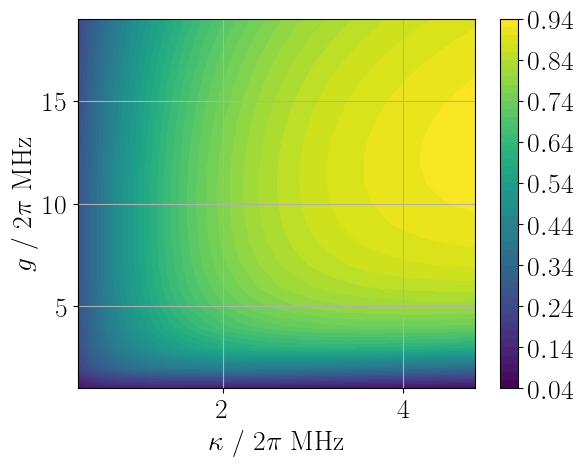

In [10]:
#Make contour plot for VSTIRAP efficiencies for d1 line and define zmatrix for contourf heights
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

z_d1vst_data=contourf_vst_d1_data[0]
x_d1vst_data=np.ndarray.flatten(contourf_vst_d1_data[1])
y_d1vst_data=np.ndarray.flatten(contourf_vst_d1_data[2])

fig, a3 = plt.subplots()

con = a3.contourf(x_d1vst_data,y_d1vst_data,z_d1vst_data, levels=50)

a3.set_ylabel('$g$ / $2\pi$ MHz', fontsize='20')

a3.set_xlabel('$\kappa$ / $2\pi$ MHz', fontsize='20')

a3.tick_params(axis='both', which='major', labelsize=20)

a3.grid()
cbar = fig.colorbar(con)
cbar.ax.tick_params(labelsize=20)

#plt.plot(adiab_list_x, adiab_list_y, 'r-')

plt.show

plt.savefig("pdf_files/contourf_d1_vst.pdf", bbox_inches='tight')

In [11]:
file_name_list = ['data/csv data/VSTcontourfz_d2.csv','data/csv data/VSTcontourfx_d2.csv','data/csv data/VSTcontourfy_d2.csv' ]

contourf_vst_d2_data=[]

for file in file_name_list:
    contourf_vst_d2_data.append(pd.read_csv('{}'.format(file), header=None).values)

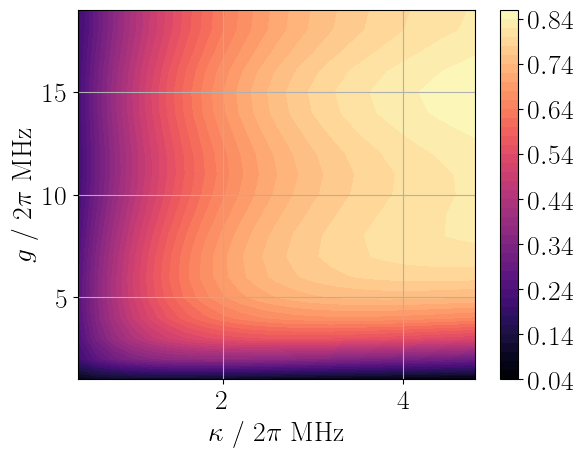

In [13]:
#Make contour plot for VSTIRAP efficiencies for d2 line and define zmatrix for contourf heights
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

z_d2vst_data=contourf_vst_d2_data[0]
x_d2vst_data=np.ndarray.flatten(contourf_vst_d2_data[1])
y_d2vst_data=np.ndarray.flatten(contourf_vst_d2_data[2])

fig, a3 = plt.subplots()

#data needs to be multiplied by 2 because the coherence method was used to estimate the efficiency (cf. App. A of paper Ernst et.al. Bursts of Polarised Photons..)
con = a3.contourf(x_d2vst_data,y_d2vst_data,[2*x for x in z_d2vst_data], levels=50,cmap='magma')

a3.set_ylabel('$g$ / $2\pi$ MHz', fontsize='20')

a3.set_xlabel('$\kappa$ / $2\pi$ MHz', fontsize='20')

a3.tick_params(axis='both', which='major', labelsize=20)

a3.grid()
cbar = fig.colorbar(con)
cbar.ax.tick_params(labelsize=20)

#plt.plot(adiab_list_x, adiab_list_y, 'r-')

plt.show

plt.savefig("pdf_files/contourf_d2_vst.pdf", bbox_inches='tight')

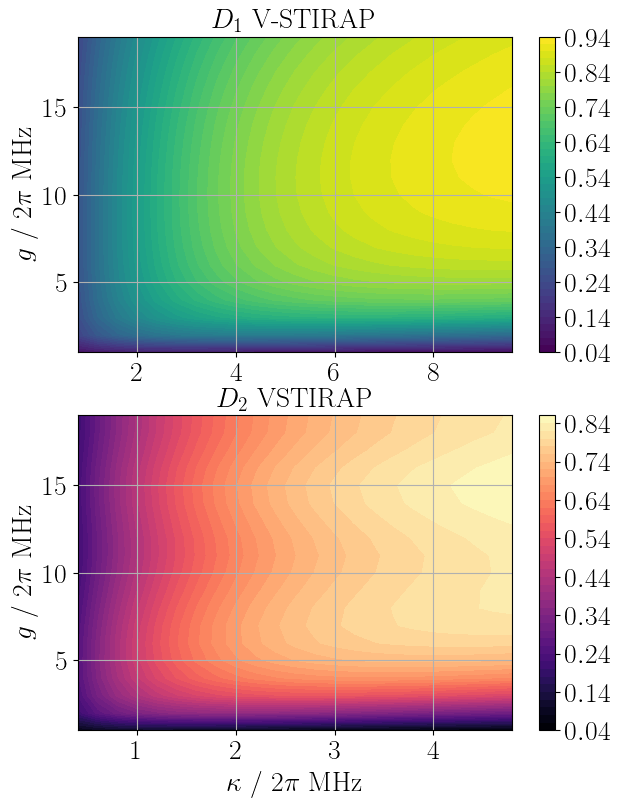

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))

con1 = axes[0].contourf([2*x for x in x_d1vst_data],y_d1vst_data,z_d1vst_data, levels=50)

axes[0].set_ylabel('$g$ / $2\pi$ MHz', fontsize='20')

#axes[0].set_xlabel('Peak Rabi frequency /MHz')

axes[0].grid()
axes[0].set_title('$D_1$ V-STIRAP', {'fontsize':20})
axes[0].tick_params(axis='both', which='major', labelsize=20)
cbar1=fig.colorbar(con1, ax=axes[0])
cbar1.ax.tick_params(labelsize=20)
con2 = axes[1].contourf(x_d2vst_data,y_d2vst_data,[2*x for x in z_d2vst_data], levels=50,cmap='magma')

axes[1].set_ylabel('$g$ / $2\pi$ MHz', fontsize='20')

axes[1].set_xlabel('$\kappa$ / $2\pi$ MHz', fontsize='20')

axes[1].grid()
axes[1].set_title('$D_2$ VSTIRAP', {'fontsize':20})
axes[1].tick_params(axis='both', which='major', labelsize=20)
cbar2=fig.colorbar(con2, ax=axes[1])
cbar2.ax.tick_params(labelsize=20)

plt.show

plt.savefig("pdf_files/contourf_vstirap_d1&d2.pdf", bbox_inches='tight')

In [16]:
file_name_list = ['data/csv data/contourf_ideal_maskedhyper_z.csv','data/csv data/contourf_ideal_maskedhyper_x.csv','data/csv data/contourf_ideal_maskedhyper_y.csv' ]

contourf_ideal_data=[]

for file in file_name_list:
    contourf_ideal_data.append(pd.read_csv('{}'.format(file), header=None).values)

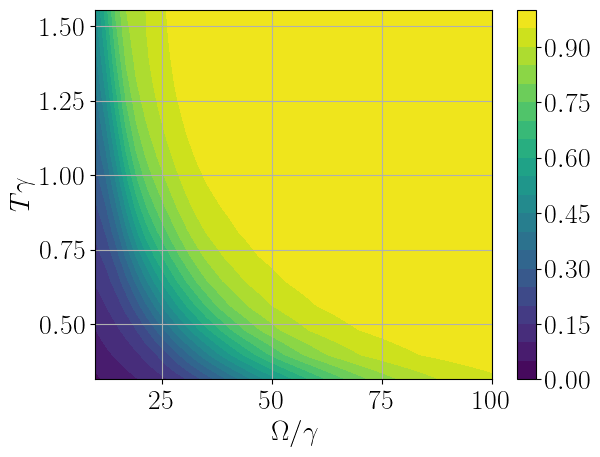

In [18]:
#Make contour plot for rempumping efficiencies for idealised three level system and define zmatrix for contourf heights
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

lengthRepumpList = [2*np.pi*x for x in np.round(np.linspace(0.05,0.25,16).tolist(),3)]

z_ideal_data=contourf_ideal_data[0]
x_ideal_data=np.ndarray.flatten(contourf_ideal_data[1])
y_ideal_data=np.ndarray.flatten(contourf_ideal_data[2])


#adiab_list_y = [x for x in lengthRepumpList]
#adiab_list_x = [(1)/(x) for x in adiab_list_y]

fig, a3 = plt.subplots()

#con = a3.contourf([2*np.pi*x for x in x_ideal_data],[3*x for x in y_ideal_data],z_ideal_data, levels=[0,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])
con = a3.contourf(x_ideal_data,[2*np.pi*x for x in y_ideal_data],z_ideal_data, levels=20)

a3.set_ylabel('$T \gamma$', fontsize='20')

a3.set_xlabel('$\Omega / \gamma $', fontsize='20')

a3.tick_params(axis='both', which='major', labelsize=20)

a3.grid()
cbar = fig.colorbar(con)
cbar.ax.tick_params(labelsize=20)

#plt.plot(adiab_list_x, adiab_list_y, 'r-')

plt.show

plt.savefig("pdf_files/contourf_ideal3level.pdf", bbox_inches='tight')

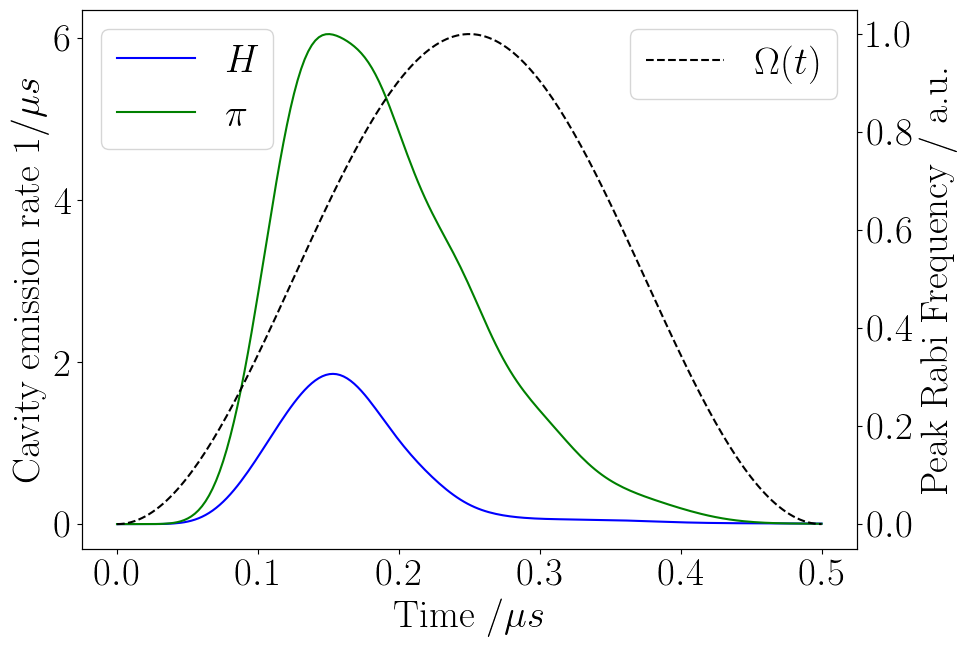

In [19]:
#plotting the photon polarisation when incorrectly preparing the state in g2M for D2 with cooperativity of around 10.

exp_x_pol=[0.0, 1.682232385834413e-11, 2.986251671571052e-09, 5.568234895378846e-08, 4.1449044075341337e-07, 1.994139708667967e-06, 7.420275165465737e-06, 2.2719017364379737e-05, 5.970523311235726e-05, 0.0001397029964688795, 0.0002978502847355207, 0.0005870001246714772, 0.0010828622057263433, 0.0018894281831611608, 0.0031409174593678567, 0.005003196772519508, 0.007677044296220312, 0.011395679370399056, 0.016417348533623387, 0.023022974991486218, 0.0315116058640786, 0.04218517581444398, 0.05533825768978902, 0.07125600954866014, 0.09020028807999805, 0.11239266325892434, 0.13801537886883808, 0.1672098756940915, 0.20005994537634492, 0.23659050768677511, 0.2767811516830244, 0.3205598842083077, 0.367795056151866, 0.41831395233752405, 0.47191349072697014, 0.5283482431305395, 0.5873390419647707, 0.6485959108841278, 0.711811811370752, 0.7766540267386989, 0.8427850523380103, 0.9098695696496555, 0.9775553733670439, 1.045478570346433, 1.1132814451380206, 1.180597859078996, 1.2470401036544334, 1.3122167445225417, 1.37573373259317, 1.4371731825368463, 1.4961007024542061, 1.5520824773600783, 1.6046717973037443, 1.653404221482387, 1.6978219035324171, 1.7374788639940002, 1.7719318851867445, 1.80076153212263, 1.8235957146343984, 1.840106462833592, 1.8500206247085837, 1.8531499417228576, 1.8493970527469403, 1.8387531075385848, 1.8213176433178495, 1.7973075099768985, 1.7670419166972287, 1.7309401494057688, 1.6895235246470786, 1.6433921560159699, 1.593200962578986, 1.5396502851489826, 1.4834625974666604, 1.4253494642001026, 1.3659953829213658, 1.3060432797649582, 1.246068741905692, 1.186566211407714, 1.1279480559225115, 1.0705366281267357, 1.0145601767020644, 0.9601645980101482, 0.9074243092271562, 0.8563496587106835, 0.8069054360216461, 0.7590323696143125, 0.7126603076612518, 0.6677233369025652, 0.624177726836075, 0.5820099618740243, 0.5412387026570094, 0.501918007246863, 0.4641336943887998, 0.42799182982888123, 0.39360892692161464, 0.36110202364907507, 0.33057476068993646, 0.3021067160256754, 0.2757480887619003, 0.25151453206768243, 0.2293846381554085, 0.20930325011226264, 0.1911859539919715, 0.17492346830758393, 0.16038891487611964, 0.1474455225322671, 0.13595204483015494, 0.1257682104102984, 0.11676013312671565, 0.10880311721864239, 0.10178314775211589, 0.09559844551912988, 0.09015933351993027, 0.0853866867848355, 0.08121083023941515, 0.0775700819834227, 0.07440846452974603, 0.07167420501907971, 0.06931892191530985, 0.06729651318118215, 0.06556267788499151, 0.06407535344714667, 0.06279490808238725, 0.06168432916506673, 0.06070996832868512, 0.05984194724821384, 0.05905403240332061, 0.0583237341978378, 0.057632256503836556, 0.05696387022571796, 0.056305404680507445, 0.0556459574291759, 0.05497628319046791, 0.05428822376989378, 0.05357455986584799, 0.05282880398796194, 0.05204489115576598, 0.05121722370244746, 0.050340830619219186, 0.049411321198629295, 0.04842497911197584, 0.04737905556645833, 0.0462718771173212, 0.045102885201511886, 0.043872864643808795, 0.042584046839644056, 0.04124006804405026, 0.03984602398889139, 0.038408461251748606, 0.03693516213617139, 0.03543503393978957, 0.03391798292784729, 0.03239454130676438, 0.03087556882740014, 0.029372081654938566, 0.02789486922643769, 0.026454088293220716, 0.025059113912222142, 0.02371831782817439, 0.02243873265123306, 0.021225953884665336, 0.020084149442325044, 0.019015946463136757, 0.01802241464075503, 0.017103251653445915, 0.01625690842828033, 0.01548067705624216, 0.0147709311630736, 0.014123386511247418, 0.013533275538510529, 0.012995541920788575, 0.012505080357392836, 0.012056925429705552, 0.011646365737182782, 0.011269053713166666, 0.010921115509665548, 0.010599185163249217, 0.010300374834223146, 0.010022263054199235, 0.009762864081271928, 0.009520518294261334, 0.009293788813672257, 0.00908139818838907, 0.008882119985744728, 0.008694658585267539, 0.008517598702679525, 0.008349365035747063, 0.008188153134886179, 0.008031927415115646, 0.007878461929794876, 0.007725359613887705, 0.007570100388552023, 0.0074101432160104536, 0.007243014250525891, 0.007066381823124437, 0.006878166526843092, 0.006676647590996442, 0.006460531438226326, 0.006229039011783688, 0.005981967370566382]
exp_y_pol=[0.0, 1.065918663242502e-12, 7.594931045585691e-10, 3.152933266023558e-08, 3.7832032502964227e-07, 2.3459597361559067e-06, 9.956592829175064e-06, 3.3355623836797536e-05, 9.412637503421791e-05, 0.000232058278939298, 0.0005147740620698312, 0.0010501272308011164, 0.0019975050606320234, 0.0035799069914682763, 0.00610024842100925, 0.009953025104039035, 0.015628731358462166, 0.023724119905168962, 0.0349509450605261, 0.05012611525850889, 0.07016247856210389, 0.09607151139570166, 0.12894487512352557, 0.16991873707820226, 0.22016202161335396, 0.2808622882648543, 0.353173571092026, 0.43817874701343223, 0.5368835953445156, 0.6501733141318461, 0.77874874145265, 0.9231153393329173, 1.0835707149256917, 1.2601376747424418, 1.452531887253801, 1.6601813650990296, 1.882194832873428, 2.1173136945257514, 2.36394451395875, 2.6201912310377637, 2.883827019257796, 3.1523226896114105, 3.4229400319274266, 3.692766406499, 3.958742376454034, 4.217782614474654, 4.466885469296315, 4.703175947784243, 4.92400735957072, 5.127105659932631, 5.310628216821162, 5.473203946559055, 5.614033933637601, 5.732932856125573, 5.830282039089655, 5.9070153560130985, 5.964596864366831, 6.004892572105447, 6.030031328419524, 6.042308746675899, 6.044031412135281, 6.03732807154323, 6.0240383234822055, 6.005622473415311, 5.983047825938444, 5.956754774900537, 5.926705931856106, 5.892428507799835, 5.853095432337164, 5.807689847041043, 5.755160389395101, 5.694544591811365, 5.625120871513098, 5.54653695815859, 5.458853999645375, 5.3625634832226385, 5.258587319459857, 5.148203214527475, 5.032932101693757, 4.914443972949259, 4.7944474112734525, 4.674563009045262, 4.55624076024112, 4.440708836997645, 4.328918097736563, 4.221516231652447, 4.118859550955984, 4.021017243211905, 3.9277759148235316, 3.8386731759146686, 3.753033040120394, 3.669993532126629, 3.5885610341158714, 3.5076842468718, 3.42632123454293, 3.343516763473148, 3.2584922620624446, 3.1707131975289236, 3.079930853289982, 2.986211202033453, 2.8899297637737176, 2.7917253205120214, 2.6924380470629257, 2.593035969863775, 2.494524760356169, 2.397864616852593, 2.303909101280777, 2.213356008820404, 2.1267154949354237, 2.0443060192050346, 1.9662646413671536, 1.89256158176793, 1.8230256833306508, 1.757374871519252, 1.6952398908076791, 1.6361873214988072, 1.579746370826062, 1.5254313470414125, 1.4727614288715594, 1.4212850800781949, 1.37060333862914, 1.3203869095353822, 1.2703920127712316, 1.2204728530410531, 1.1705836931909683, 1.1207736617036514, 1.0711777794618293, 1.02200039747904, 0.9734928768464589, 0.9259321207960322, 0.879599666488964, 0.8347606303046953, 0.7916474874011905, 0.7504498252915104, 0.7113069425431662, 0.6743044880123783, 0.6394766098482271, 0.6068103024404099, 0.576250439421024, 0.5477070761649678, 0.5210635459701818, 0.49618307200686296, 0.47291512198825836, 0.45110203461708775, 0.4305840984675077, 0.4112039254233524, 0.39280991375102187, 0.37525955810709694, 0.3584222509101231, 0.3421810436496933, 0.32643403817731065, 0.31109566748344364, 0.2960971643566981, 0.2813862484026008, 0.26692671211442714, 0.2526976644078603, 0.23869196831149048, 0.22491443352438176, 0.21138013742452602, 0.1981123777344105, 0.18514034920357625, 0.17249717692605424, 0.16021811857861187, 0.14833863897882987, 0.13689279746474334, 0.12591219142735596, 0.11542480877573788, 0.10545409940842741, 0.09601864810124394, 0.08713192264282232, 0.07880200978357806, 0.07103176158349182, 0.06381911793214881, 0.05715730948742099, 0.05103522847245763, 0.045437978924590075, 0.04034730208068488, 0.035741991866914215, 0.031598446323580484, 0.02789114671820749, 0.024593038492388693, 0.02167598426231254, 0.019111210139587383, 0.016869645613832352, 0.014922266304669302, 0.013240461279302165, 0.01179633469229594, 0.01056295562213336, 0.009514623649174093, 0.0086270937825317, 0.007877748303542447, 0.007245742971216218, 0.006712122544340535, 0.006259892261696126, 0.0058740477509028706, 0.0055415673812443085, 0.005251374904355296, 0.004994272306220809, 0.004762849004294753, 0.004551357329157689]
lengthStirap=0.5
wStirap=np.pi/lengthStirap
t_vst_pol, t_step= np.linspace(0, lengthStirap, 200,retstep=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

f1, ap1 = plt.subplots(figsize=(10,7))

ap1.plot(t_vst_pol,exp_x_pol, 'b', label='$H$')
ap1.plot(t_vst_pol, exp_y_pol, 'g', label='$\pi$')
ap1.set_ylabel('Cavity emission rate $1/\mu s$', fontsize=28)
ap1.set_xlabel('Time /$\mu s$', fontsize=28)
ap1.legend(loc=2, fontsize=28)
ap1.tick_params(axis='x', labelsize=28)
ap1.tick_params(axis='y', labelsize=28)
aB = ap1.twinx()
aB.plot(t_vst_pol, [np.sin(wStirap*x)**2 for x in t_vst_pol], '--k', label='$\Omega(t)$')
aB.set_ylabel('Peak Rabi Frequency / a.u.', fontsize=28)
aB.tick_params(axis='y', labelsize=28)
aB.legend(loc=0, fontsize = 28)

f1path=("pdf_files/cav-emission_psi0=g2M")
f1.savefig(f1path)

/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_15320/2861607995.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


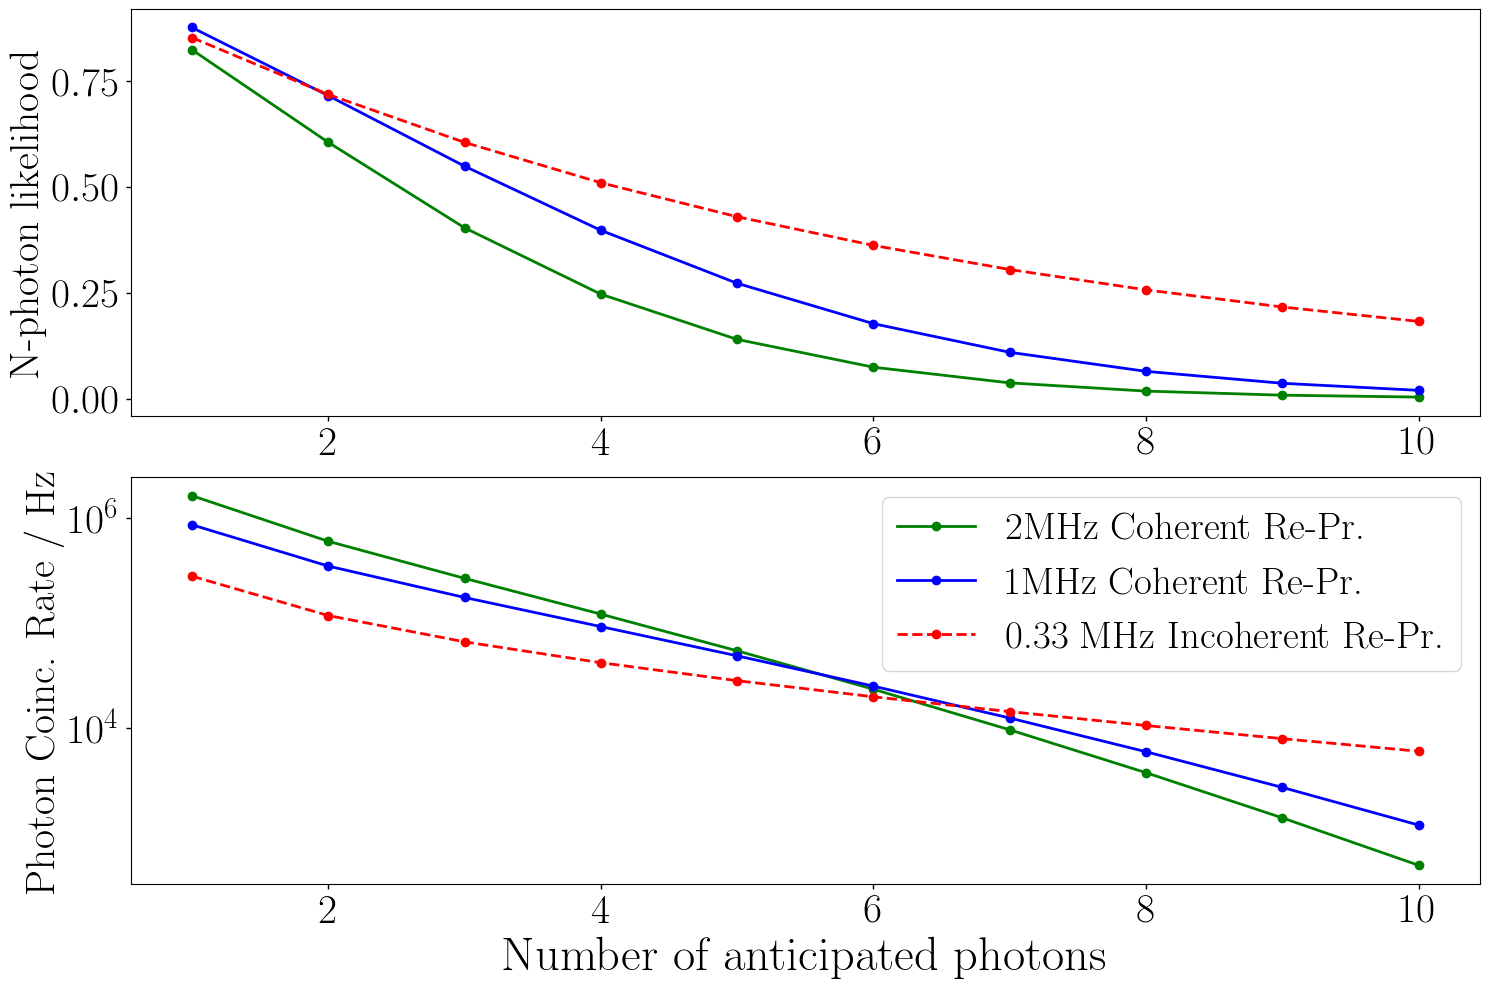

In [20]:
#Efficiency plots for D2 VST and D1 Repumping with cavity of cooperativity of around 10 (upatirs cav params)

#Efficiency can be calculated in two ways: consider the population transfer fidelity for the desired final state from which the photonic field decays or the cavity emission rate which also captures photons produced from other transitions which may however have the desired polarization.

eff_pol_2mhz=[0.824093288394687, 0.6054060543116742, 0.4034388447835938, 0.24670286614360162, 0.13980942508413188, 0.07414449419107061, 0.03710710846493517, 0.017660130365574966, 0.008046320971036006, 0.0035303513857869594]
eff_pol_1p56mhz=[0.8527203937555845, 0.6616023147518169, 0.4730790723195223, 0.3144587096257669, 0.19595677091339544, 0.1153542969966711, 0.0645897291060303, 0.034608224150566615, 0.017842241368563716, 0.008893497739315252]
eff_pol_1p19mhz=[0.865651357186681, 0.6916775845720022, 0.5137172550114485, 0.3555414007087381, 0.22982398475684782, 0.13906999902126288, 0.0789544627953943, 0.042154367969123724, 0.0212157389420894, 0.010089680311744407]
eff_pol_1Mhz=[0.8766571085222147, 0.7156722669338265, 0.549034963216858, 0.39753766105265304, 0.27237048063736663, 0.17698377028943107, 0.10931581553016237, 0.06433041414210591, 0.03615487885259802, 0.019452451439782466]


eff_op=[0.8527203937555845, 0.7183981517895212, 0.6052261060786145, 0.5098824831496988, 0.42955871203649304, 0.3618886570619306, 0.30487892909724656, 0.2568501653578676, 0.21638755961160766, 0.18229918555600372]

eff_pol_1m_masked=[0.8700296678956039, 0.702335880820804, 0.5288873475844393, 0.3719576794838724, 0.24472213225322756, 0.15090337011624255, 0.08738516930914866, 0.047620908993153854, 0.024476649499622125, 0.01189339926808202]
eff_pol_2m_masked=[0.824093288394687, 0.6053885096593643, 0.4024894085316452, 0.24455771013258662, 0.1365943825930637, 0.07046249244687494, 0.03371583955619707, 0.015029720575337928, 0.006270250892638354, 0.002459174355526962]


n_ph_list=range(1,11)

rate_op=[]
rate_1Mhz=[]
rate_2mhz=[]

for i in range(0,10):
        rate_op.append(10**6*0.33*eff_op[i]/n_ph_list[i])
        rate_1Mhz.append(10**6*1*eff_pol_1m_masked[i]/n_ph_list[i])
        rate_2mhz.append(10**6*2*eff_pol_2m_masked[i]/n_ph_list[i])


fig, axes = plt.subplots(nrows=2,figsize=(15, 10))

axes[0].set_ylabel('N-photon likelihood', fontsize=30)
#axes[0].set_xlabel('Number of photons', fontsize=35)
axes[0].tick_params(axis='x', width=1, labelsize=30)
axes[0].tick_params(axis='y', width=1, labelsize=30)
axes[0].plot(n_ph_list, eff_pol_2mhz, label='2MHz', color='green', marker='o', linewidth=2)
#axes[0].plot(n_ph_list, eff_pol_1p56mhz, label='1.56 MHz', color='red', marker='o', linestyle='dashed', linewidth=2 )
axes[0].plot(n_ph_list, eff_pol_1Mhz, label='1MHz', color='blue', marker='o', linewidth=2 )
axes[0].plot(n_ph_list, eff_op, label='2MHz', color='red', marker='o', linestyle='dashed', linewidth=2)
axes[0].tick_params(axis='both', which='major', labelsize=30)
#axes[0].legend(loc = 'lower right', fontsize=20)

axes[1].set_ylabel('Photon Coinc. Rate / Hz', fontsize=30)
axes[1].set_yscale('log')
axes[1].set_xlabel('Number of anticipated photons', fontsize=35)
axes[1].tick_params(axis='x', width=1, labelsize=30)
axes[1].tick_params(axis='y', width=1, labelsize=30)
axes[1].plot(n_ph_list, rate_2mhz, label='2MHz Coherent Re-Pr.', color='green', marker='o', linewidth=2)
#axes[1].plot(n_ph_list, [10**6*1.56*x for x in eff_pol_1p56mhz], label='1.56 MHz', color='red', marker='o', linestyle='dashed', linewidth=2 )
axes[1].plot(n_ph_list, rate_1Mhz, label='1MHz Coherent Re-Pr.', color='blue', marker='o', linewidth=2 )
axes[1].plot(n_ph_list, rate_op, label='0.33 MHz Incoherent Re-Pr.', color='red', marker='o', linestyle='dashed', linewidth=2 )
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[1].legend(loc = 'best', fontsize=28)

fig.tight_layout()
fig.show()
fig.savefig('pdf_files/photon-sequence-eff.pdf')

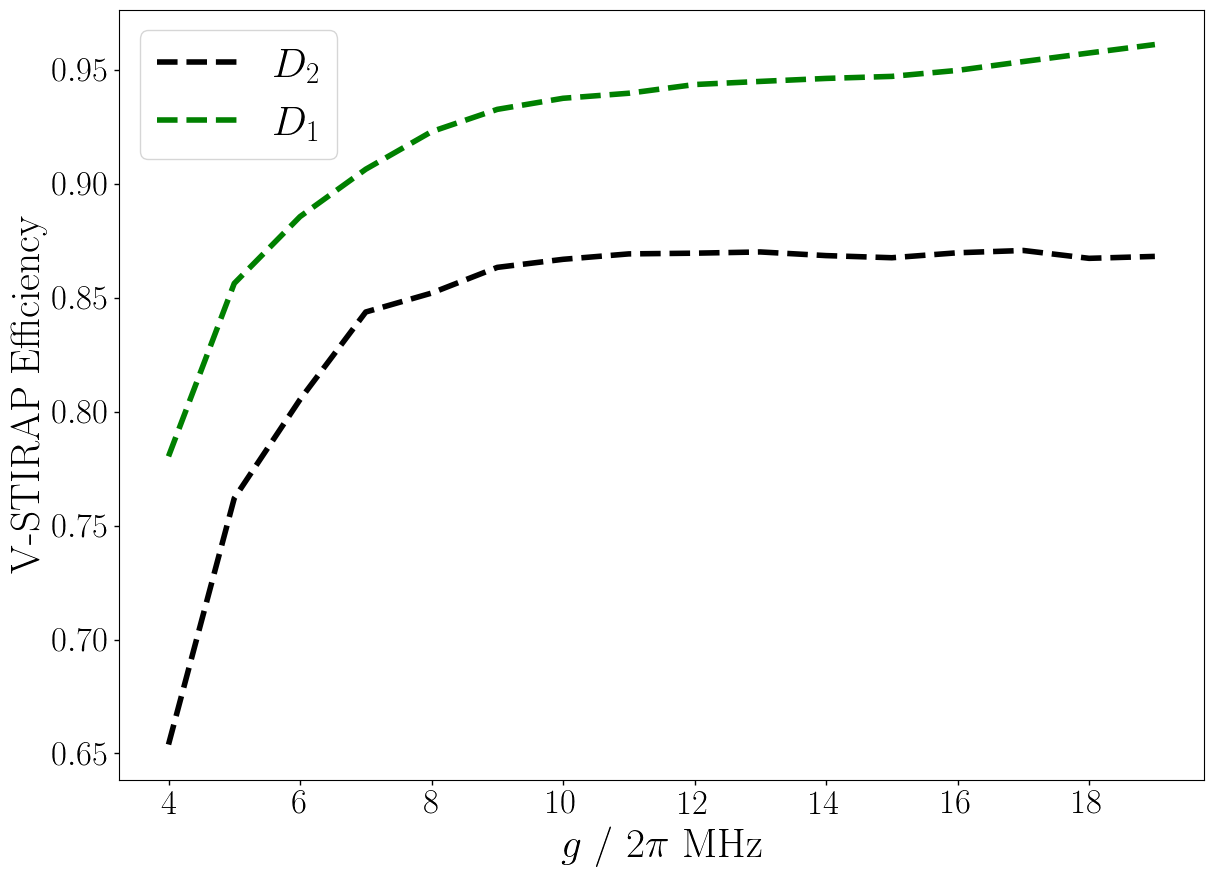

In [21]:
#new d1/d2 line comparison results for VSTIRAP at various coupling strengths
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

full_results_d2=[[4,1.7500000000000007,0.6539100978380036], [5,2.8000000000000007,0.7619671811842379], [6,3.5000000000000013,0.8053028340186799], [7,3.7000000000000006,0.8437160039342516], [8,3.8000000000000007,0.8520139662249444], [9,4.1000000000000005,0.8632988050803319], [10,4.4,0.8668380926182044], [11,4.049999999999999,0.8692193347717425], [12,4.399999999999997,0.8695287664207431], [13,4.299999999999997,0.8700687641885364], [14,4.399999999999997,0.8684676438913718], [15,7.499999999999993,0.8675295483775615], [16,7.299999999999994,0.8697110257203163], [17,6.949999999999991,0.8707179758439827], [18,7.649999999999994,0.8672668537409067],[19,7.749999999999994,0.8681184903701386], [20,7.649999999999994,0.8682344642488887], [21,8.749999999999993,0.865285194147592], [22,8.649999999999995,0.8634665247706742], [23,9.650000000000023,0.8608100542897102], [25,10.450000000000035,0.862663194534171], [30,12.85000000000004,0.8547624294294063], [35,14.700000000000053,0.8584418776976324], [40,14.700000000000053,0.8539516367495216], [50,17.700000000000053,0.842944991761249]]
full_results_d1=[[2,2.3000000000000016,0.35690379909586484],[2.5,2.3000000000000016,0.4881702614182397], [3,2.100000000000001,0.6349717002378241], [4,2.7, 0.7803582725166192], [5,3.4, 0.8562721111477803], [6,3.4, 0.8855681882121454], [7, 2.9, 0.9063793599331978], [8, 2.900000000000001, 0.9228628590882393], [9,2.900000000000001,0.9326412399554278], [10,2.8000000000000007,0.9375037071457802], [11,2.299999999999999,0.9397166543425798], [12,2.299999999999999,0.9435353207998085], [13,2.299999999999999,0.9449102809677923], [14,2.1499999999999995,0.9462160214040698], [15,2.1499999999999995,0.9471153854077892],[16,4.999999999999989,0.9497493327618255],  [17,4.999999999999989,0.9536270556783135], [18,4.999999999999989,0.957386647820901], [19,4.999999999999989,0.9610913786443469], [20,4.999999999999989,0.9648319157645426]]
f, (a1) = plt.subplots(1, 1, sharex=True, figsize=(14, 10))

a1.set_ylabel('V-STIRAP Efficiency', fontsize=30)
a1.set_xlabel('$g$ / $2 \pi$ MHz', fontsize=30)
a1.tick_params(axis='x', width=1, labelsize=25)
a1.tick_params(axis='y', width=1, labelsize=25)
a1.plot([full_results_d2[x][0] for x in range(0,16)], [full_results_d2[x][2] for x in range(0,16)], label='$D_2$', color='black', linewidth=4,linestyle='dashed' )
a1.plot([full_results_d1[x][0] for x in range(3,19)], [full_results_d1[x][2] for x in range(3,19)], label='$D_1$', color='green', linewidth=4, linestyle='dashed' )
a1.tick_params(axis='both', which='major', labelsize=25)
a1.legend(loc = 'best', fontsize=30)
f.savefig('pdf_files/vst-eff-d2-d1.pdf')

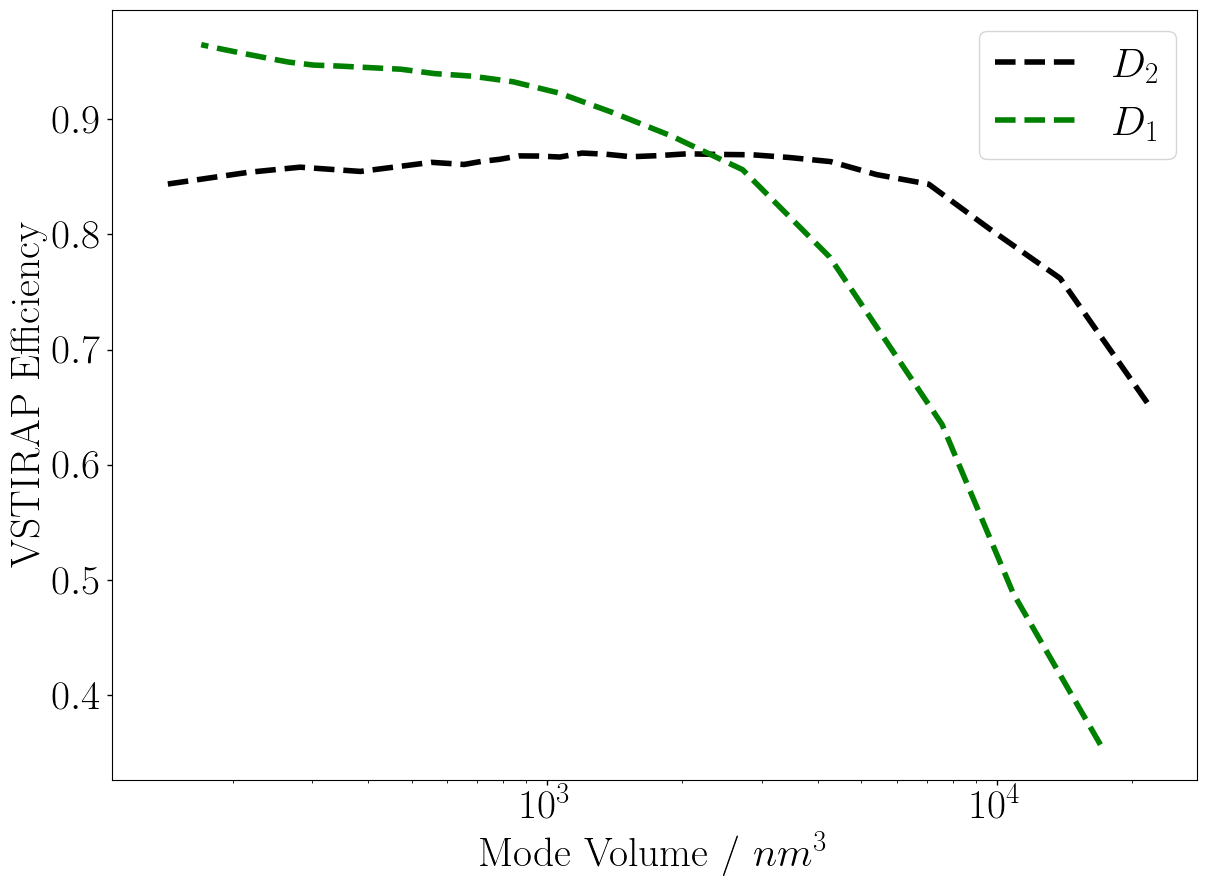

In [24]:
v_d1_list = []
v_d2_list = []

const = 1/(2*const.epsilon_0*const.hbar)

mu_d1 = 2.5373*10**(-29)*np.sqrt(1/12)
mu_d2 = 3.5844*10**(-29)*np.sqrt(5/24)

wc_d1 = 377.1112248*2*np.pi*10**12
wc_d2 = 384.2345263*2*np.pi*10**12

for x in [full_results_d2[y][0] for y in range(0,len(full_results_d2))]:
   v_d2_list.append(mu_d2**2*wc_d2*const*1/(10**(12)*(x*10**6)**2))

for x in [full_results_d1[y][0] for y in range(0,len(full_results_d1))]:
   v_d1_list.append(mu_d1**2*wc_d1*const*1/(10**(12)*(x*10**6)**2))
   
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
f, (a1) = plt.subplots(1, 1, sharex=True, figsize=(14, 10))
   
a1.set_ylabel('VSTIRAP Efficiency', fontsize=30)
a1.set_xlabel('Mode Volume / $nm^3$', fontsize=30)
a1.tick_params(axis='x', width=1, labelsize=25)
a1.tick_params(axis='y', width=1, labelsize=25)
a1.plot([10**27*x for x in v_d2_list], [full_results_d2[x][2] for x in range(0,len(v_d2_list))], label='$D_2$', color='black', linewidth=4, linestyle='dashed', markersize=10 )
a1.plot([10**27*x for x in v_d1_list], [full_results_d1[x][2] for x in range(0,len(v_d1_list))], label='$D_1$', color='green', linewidth=4, linestyle='dashed', markersize=10 )
a1.set_xscale('log')
a1.tick_params(axis='both', which='major', labelsize=30)
a1.legend(loc = 'best', fontsize=30)
f.savefig('pdf_files/vst-eff-d2-d1-volume.pdf')

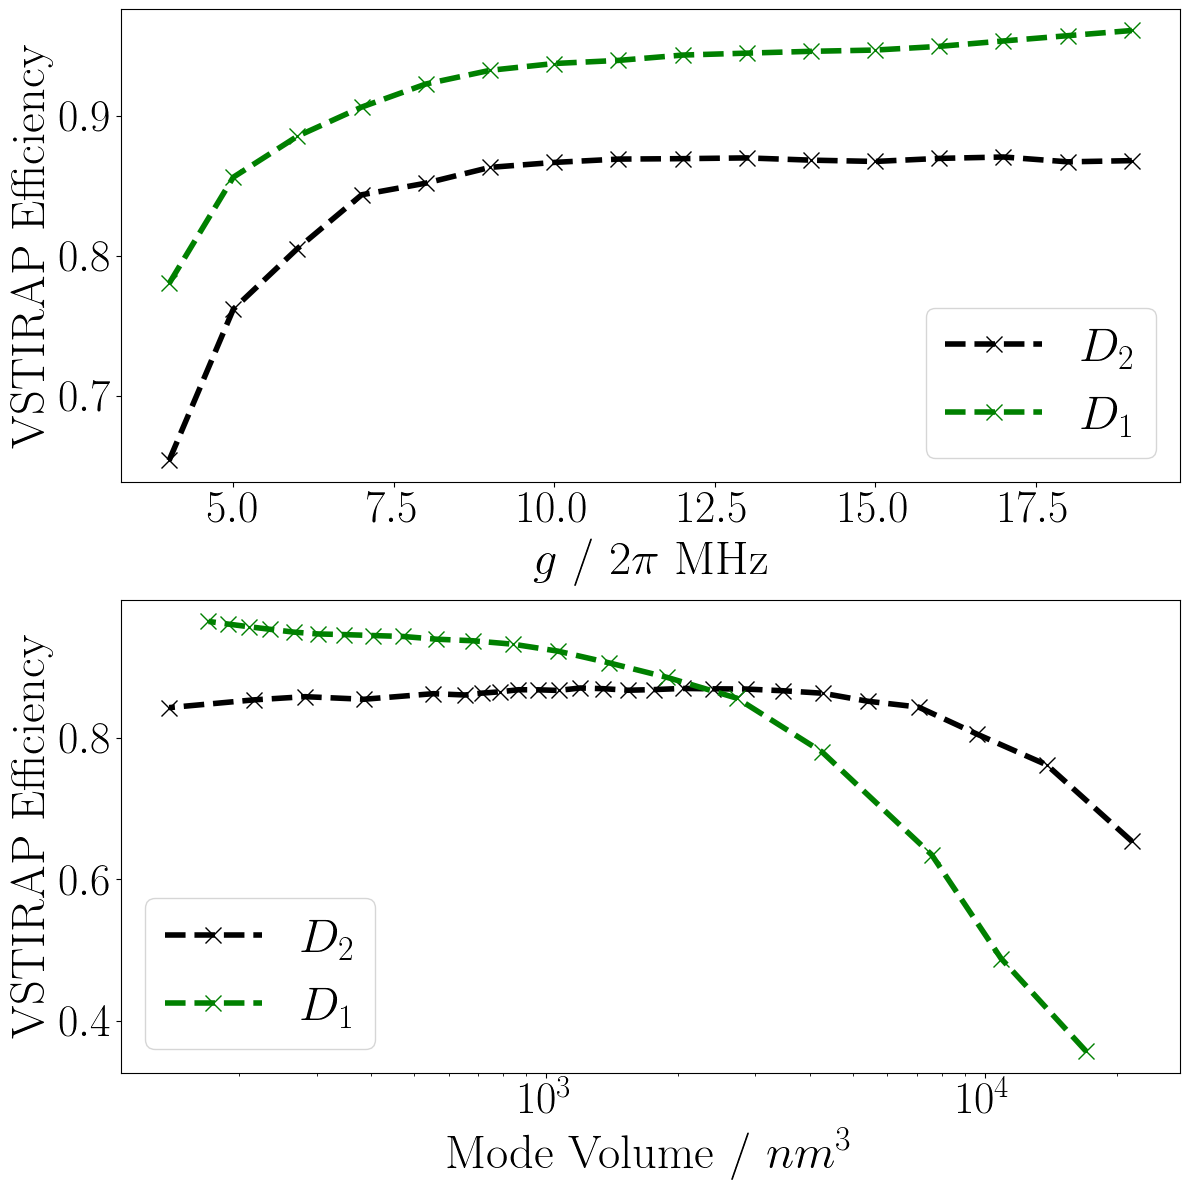

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

axes[0].set_ylabel('VSTIRAP Efficiency', fontsize=35)
axes[0].set_xlabel('$g$ / $2 \pi$ MHz', fontsize=35)
axes[0].plot([full_results_d2[x][0] for x in range(0,16)], [full_results_d2[x][2] for x in range(0,16)], label='$D_2$', color='black', linewidth=4, linestyle='dashed', marker='x', markersize=12  )
axes[0].plot([full_results_d1[x][0] for x in range(3,19)], [full_results_d1[x][2] for x in range(3,19)], label='$D_1$', color='green', linewidth=4, linestyle='dashed',marker='x', markersize=12 )
axes[0].tick_params(axis='both', which='major', labelsize=32)
axes[0].legend(loc = 'best', fontsize=35)

axes[1].set_ylabel('VSTIRAP Efficiency', fontsize=35)
axes[1].set_xlabel('Mode Volume / $nm^3$', fontsize=35)
axes[1].plot([10**27*x for x in v_d2_list], [full_results_d2[x][2] for x in range(0,len(v_d2_list))], label='$D_2$', color='black', linewidth=4, linestyle='dashed',marker='x', markersize=12)
axes[1].plot([10**27*x for x in v_d1_list], [full_results_d1[x][2] for x in range(0,len(v_d1_list))], label='$D_1$', color='green', linewidth=4, linestyle='dashed',marker='x', markersize=12)
axes[1].set_xscale('log')
axes[1].tick_params(axis='both', which='major', labelsize=32)
axes[1].legend(loc = 'best', fontsize=35)

fig.tight_layout()
fig.savefig('pdf_files/vst-eff-d2-d1-both.pdf')

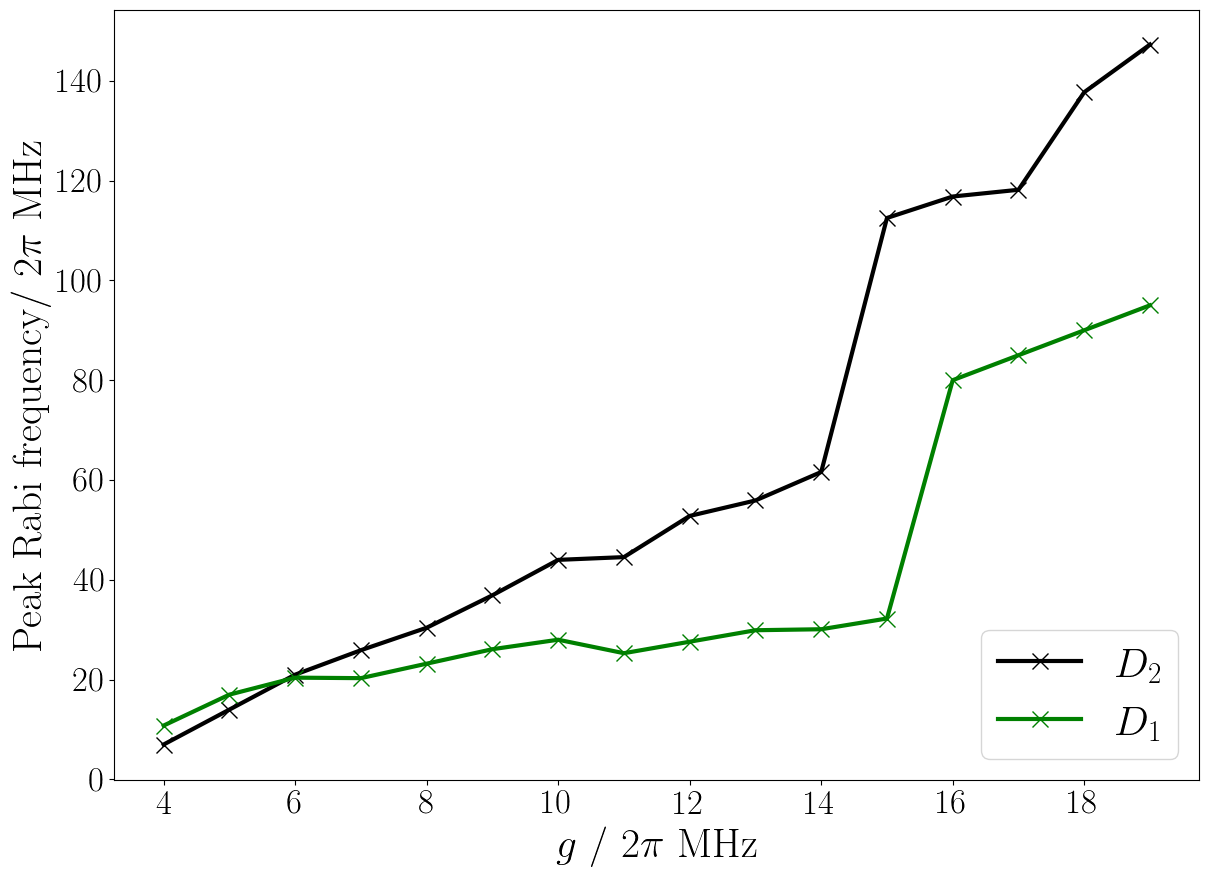

In [28]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

f, (a1) = plt.subplots(1, 1, sharex=True, figsize=(14, 10))

a1.set_ylabel('Peak Rabi frequency/ $2 \pi$ MHz', fontsize=30)
a1.set_xlabel('$g$ / $2 \pi$ MHz ', fontsize=30)
#a1.plot(clist_d2, [2*x for x in d2_vst_eff_optimal], label='D2 line, idealized system', color='black', marker='o',  linestyle='dashed', linewidth=2)
a1.plot([full_results_d2[x][0] for x in range(0,16)], [full_results_d2[x][1]*full_results_d2[x][0] for x in range(0,16)], label='$D_2$', color='black', linewidth=3, marker='x', markersize=12 )
a1.plot([full_results_d1[x][0] for x in range(3,19)], [full_results_d1[x][1]*full_results_d1[x][0] for x in range(3,19)], label='$D_1$', color='green', linewidth=3, marker='x', markersize=12 )
#a1.plot(clist_d1, [2*x for x in d1_vst_eff_optimal], label='D1 line idealized system', color='green', linestyle='dashed', marker='o', linewidth=2 )
#a1.plot(clist, [(2*x)/(2*x+1) for x in clist], label='theoretical maximum', color='red', marker='o', linewidth=2 )
a1.tick_params(axis='both', which='major', labelsize=25)
a1.legend(loc = 'lower right', fontsize=30)
f.savefig('pdf_files/vst-omega-d2-d1.pdf')

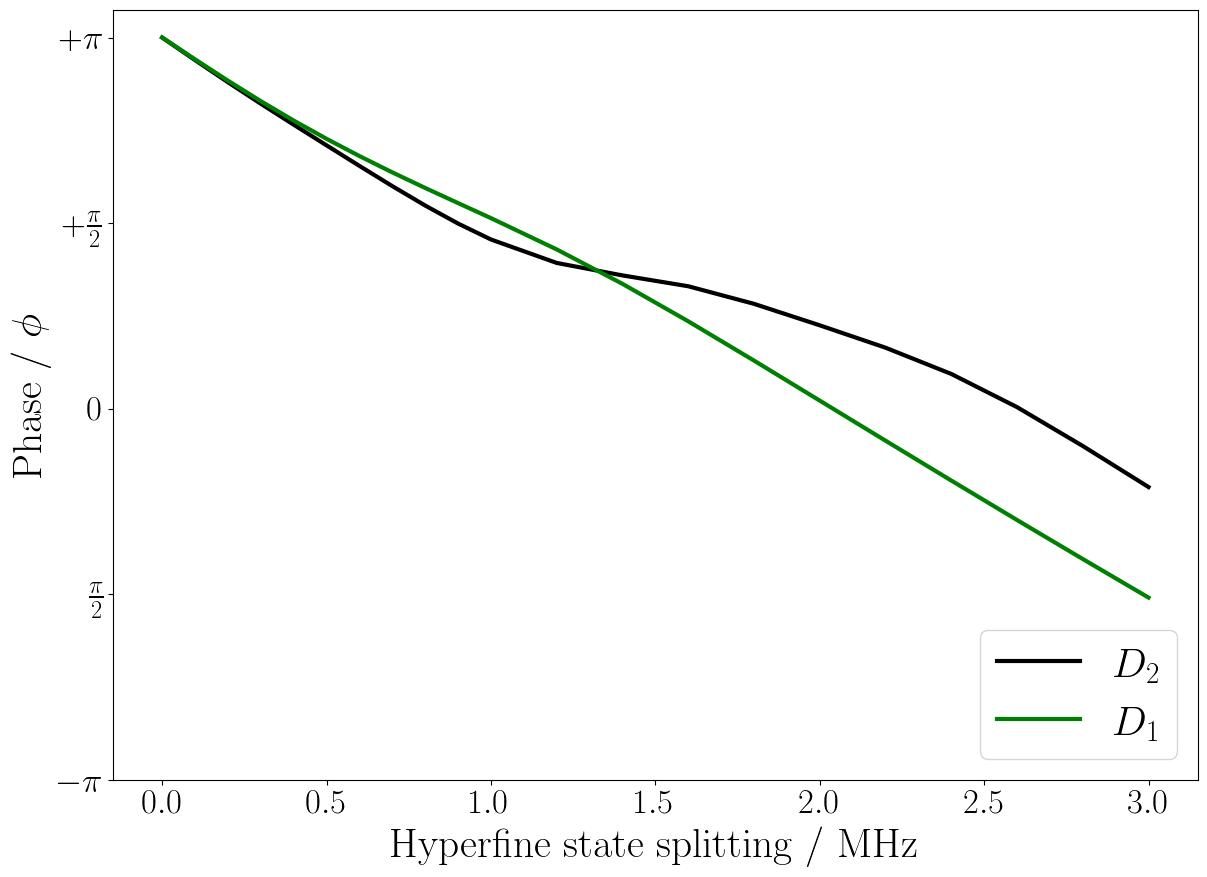

In [29]:
#external bfield phase of vstirap
d1_results=[['0', 3.141592653589793, 0.8745627884768485], ['0p1', 2.95699123106801, 0.8692149163583932], ['0p2', 2.7764122181101722, 0.8541171931084031], ['0p3', 2.6030512079757657, 0.8317653094451872], ['0p4', 2.438740567270765, 0.8053627121445115], ['0p5', 2.2839074233506893, 0.7779321885939723], ['0p6', 2.137970709824613, 0.7518156225003082], ['0p7', 1.9997928619520162, 0.7287066186051242], ['0p8', 1.867782563118747, 0.7098923962576965], ['0p9', 1.7396710901454493, 0.6963276300381019], ['1', 1.6123967676394286, 0.6884102885817202], ['1p2', 1.3474201232663332, 0.6868308929009224], ['1p4', 1.05592232427017, 0.6933186612922678], ['1p6', 0.7388782264473286, 0.6945829486410104], ['1p8', 0.406144552347863, 0.6839702258414745], ['2', 0.06716324388283626, 0.6610855095230015], ['2p2', -0.2721864341410173, 0.6287845685139961], ['2p4', -0.609553236993801, 0.5904691592842909], ['2p6', -0.9438643856082167, 0.5486512016766487], ['2p8', -1.2742573829506167, 0.5055321445228714], ['3', -1.600744310742684, 0.46319796521287504]]
d2_results=[['0', 3.141592653589793, 0.8347281676254388], ['0p1', 2.9504807617936026, 0.8293159126943106], ['0p2', 2.7630402286059232, 0.8143395077057094], ['0p3', 2.581012047967732, 0.7927020898567229], ['0p4', 2.403559767087793, 0.7669738503288469], ['0p5', 2.2285175927003604, 0.7378535771069544], ['0p6', 2.0547019055652327, 0.7042584365707799], ['0p7', 1.8835233021683904, 0.6648034227165521], ['0p8', 1.718961452196367, 0.6193399761064577], ['0p9', 1.5664335992388123, 0.5695094712725381], ['1', 1.4315683365690126, 0.5183134038782575], ['1p2', 1.2328921953943712, 0.42644649252183187], ['1p4', 1.1273251264117559, 0.3712841950615617], ['1p6', 1.0355011468640638, 0.36021794802937035], ['1p8', 0.8866049826840317, 0.36859754388966304], ['2', 0.7047373858921252, 0.37713066383210314], ['2p2', 0.5152701664245257, 0.3915374899299551], ['2p4', 0.293028277374705, 0.4187404964369403], ['2p6', 0.012004861032329006, 0.448169239772379], ['2p8', -0.317025469509508, 0.46229566522415005], ['3', -0.6647690819451673, 0.4519111140968047]]

list_split=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3]

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

f, (a1) = plt.subplots(1, 1, sharex=True, figsize=(14, 10))

y_label = ['$- \pi$', '$\\frac{\pi}{2}$', '$0$', '+$\\frac{\pi}{2}$','$+\pi$', ]
y_tick=[-1, -0.5, 0, 0.5, 1]

a1.set_ylabel('Phase / $\phi$', fontsize=30)
a1.set_xlabel('Hyperfine state splitting / MHz ', fontsize=30)
a1.plot(list_split, [x[1] for x in d2_results], label='$D_2$', color='black', linewidth=3 )
a1.plot(list_split, [x[1] for x in d1_results], label='$D_1$', color='green', linewidth=3 )

a1.set_yticks([x*np.pi for x in y_tick])
a1.set_yticklabels(y_label, fontsize=20)

a1.tick_params(axis='both', which='major', labelsize=25)
a1.legend(loc = 'lower right', fontsize=30)
f.savefig('pdf_files/bfield-split-vst.pdf')

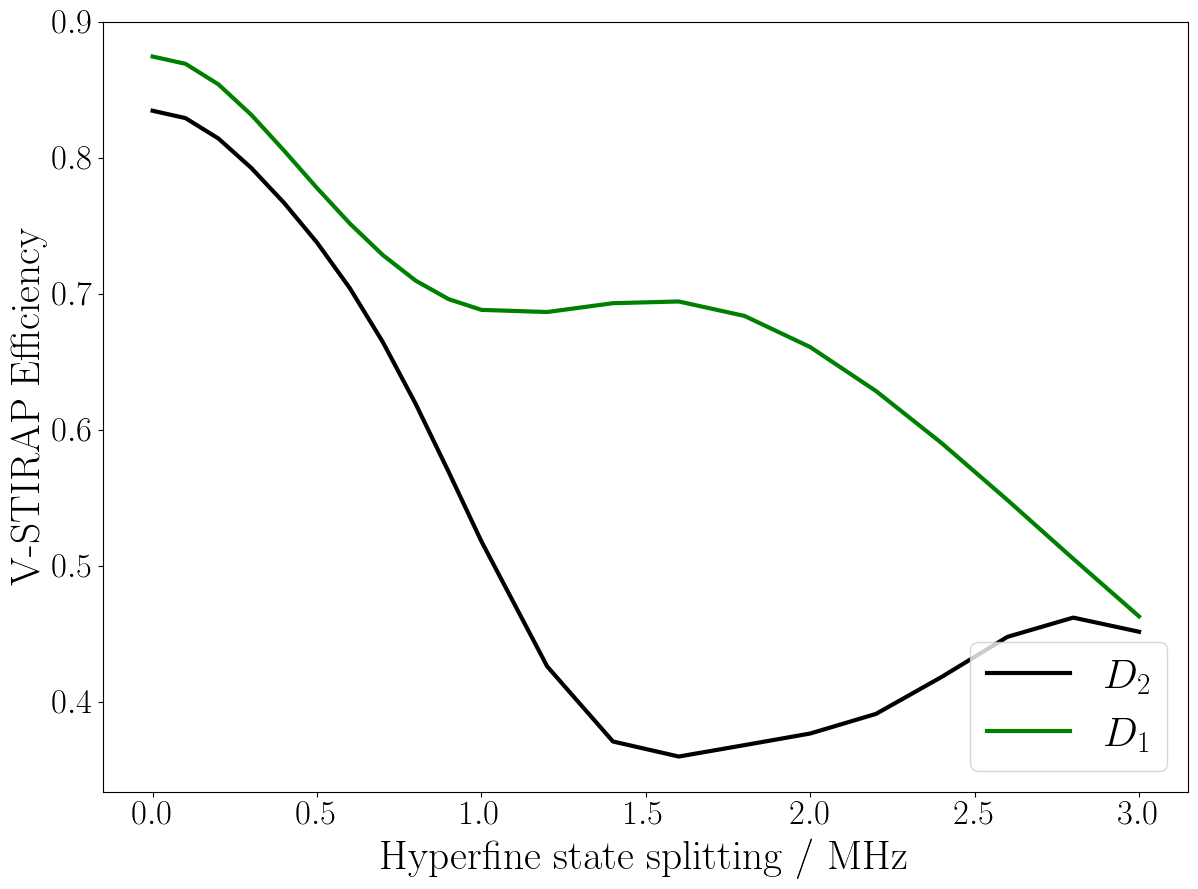

In [30]:
f, (a1) = plt.subplots(1, 1, sharex=True, figsize=(14, 10))

a1.set_ylabel('V-STIRAP Efficiency', fontsize=30)
a1.set_xlabel('Hyperfine state splitting / MHz ', fontsize=30)
a1.plot(list_split, [x[2] for x in d2_results], label='$D_2$', color='black', linewidth=3 )
a1.plot(list_split, [x[2] for x in d1_results], label='$D_1$', color='green', linewidth=3 )
a1.tick_params(axis='both', which='major', labelsize=25)
a1.legend(loc = 'lower right', fontsize=30)
f.savefig('pdf_files/bfield-split-vst-eff.pdf')

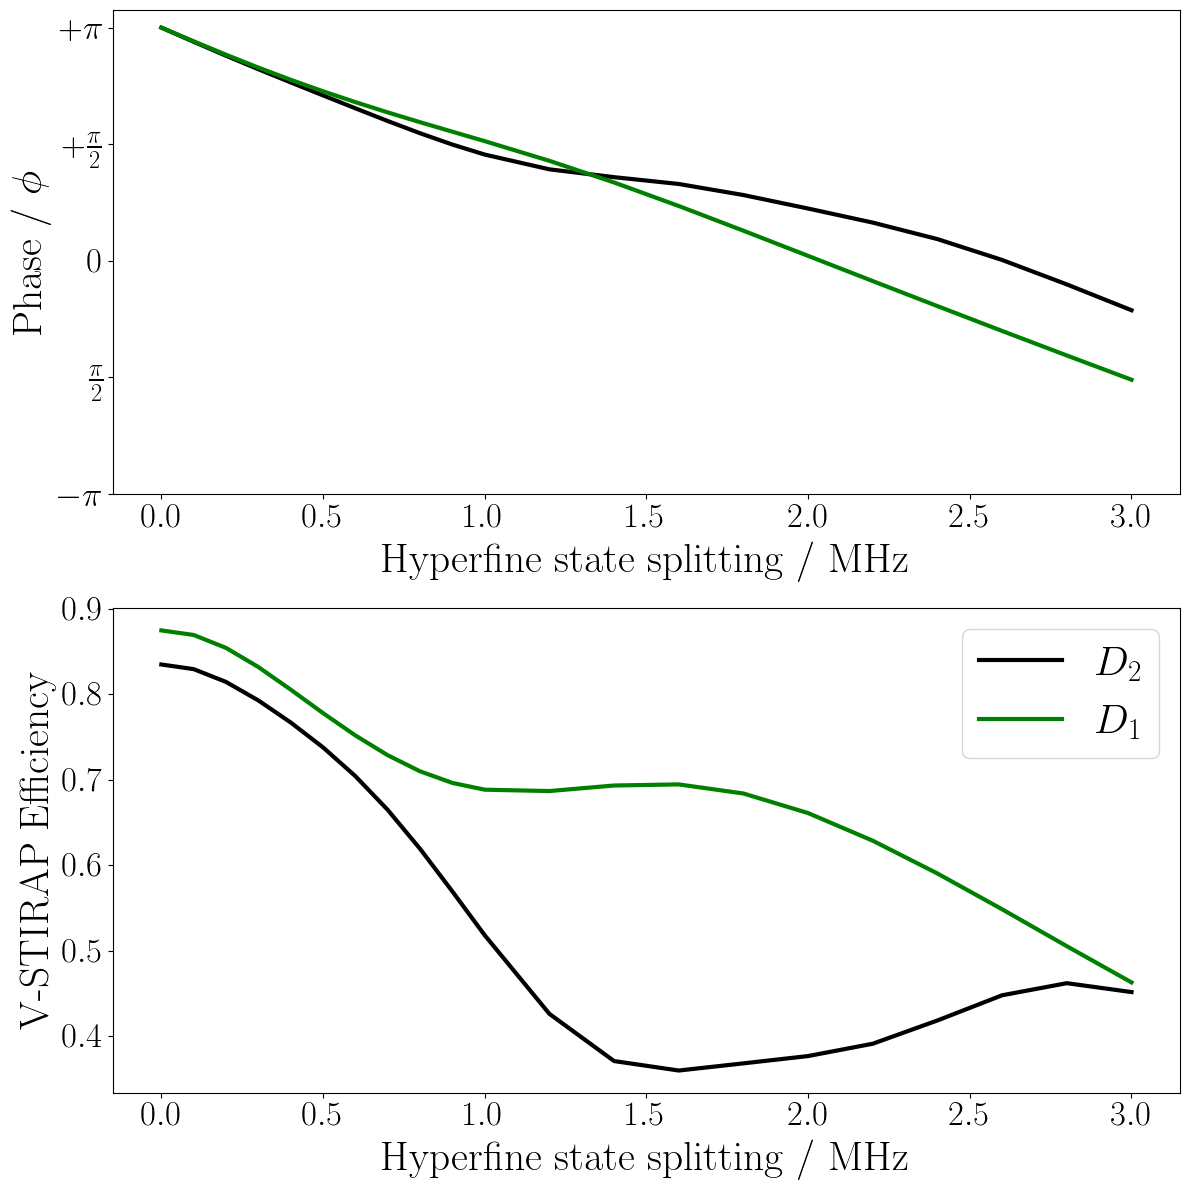

In [31]:
fig, axes = plt.subplots(nrows=2, figsize=(12, 12))

y_label = ['$- \pi$', '$\\frac{\pi}{2}$', '$0$', '+$\\frac{\pi}{2}$','$+\pi$', ]
y_tick=[-1, -0.5, 0, 0.5, 1]

axes[0].set_ylabel('Phase / $\phi$', fontsize=30)
axes[0].set_xlabel('Hyperfine state splitting / MHz ', fontsize=30)
axes[0].plot(list_split, [x[1] for x in d2_results], label='$D_2$', color='black', linewidth=3 )
axes[0].plot(list_split, [x[1] for x in d1_results], label='$D_1$', color='green', linewidth=3 )

axes[0].set_yticks([x*np.pi for x in y_tick])
axes[0].set_yticklabels(y_label, fontsize=20)

axes[0].tick_params(axis='both', which='major', labelsize=25)
#axes[0].legend(loc = 'best', fontsize=30)

axes[1].set_ylabel('V-STIRAP Efficiency', fontsize=30)
axes[1].set_xlabel('Hyperfine state splitting / MHz ', fontsize=30)
axes[1].plot(list_split, [x[2] for x in d2_results], label='$D_2$', color='black', linewidth=3 )
axes[1].plot(list_split, [x[2] for x in d1_results], label='$D_1$', color='green', linewidth=3 )
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].legend(loc = 'best', fontsize=30)

fig.tight_layout()
fig.savefig('pdf_files/bfield-phase-eff.pdf')

In [33]:
import pickle 
file_pickle_vst= open('data/ideal_system_vst_pickle.pickle', 'rb') 
vst_ideal_pickle_load= pickle.load(file_pickle_vst)

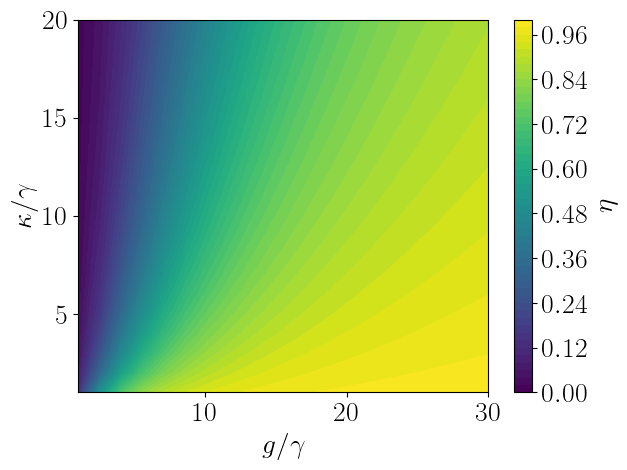

In [35]:
NUM_CONTS = 30

#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

def C(g_ratio, kappa):
    return g_ratio**2/(2*kappa/(2*np.pi))

g_ratios = np.linspace(1, 30, 20)
k_ratios = np.linspace(1, 20, 20)

data = vst_ideal_pickle_load
effs = [[data[j][k]['efficiency'] for k in range(len(g_ratios))] for j in range(len(k_ratios))]
omegas = [[data[j][k]['omega'] for k in range(len(g_ratios))] for j in range(len(k_ratios))]
bench = [[2*C(g, kappa)/(2*C(g,kappa)+1) for g in g_ratios] for kappa in k_ratios]
diff_effs = [[effs[j][k] - bench[j][k] for k in range(len(g_ratios))] for j in range(len(k_ratios))]
C_ratios = [[effs[j][k]/(2*C(g_ratios[k], k_ratios[j])*(1-effs[j][k])) for k in range(len(g_ratios))] for j in range(len(k_ratios))]


X, Y = np.meshgrid(g_ratios, k_ratios)
fig,a1 = plt.subplots(1,1)

cp1 = a1.contourf(X,Y, effs, levels=50)
cb1 = fig.colorbar(cp1)
cb1.set_label('$\eta$', fontsize=20)
a1.set_xlabel('$g/\gamma$', fontsize=20)
a1.set_ylabel('$\kappa / \gamma$', fontsize=20)
a1.tick_params(axis='both', which='major', labelsize=20)
cb1.ax.tick_params(labelsize=20)
fig.tight_layout()
fig.savefig('pdf_files/vst_ideal_contourkg.pdf')



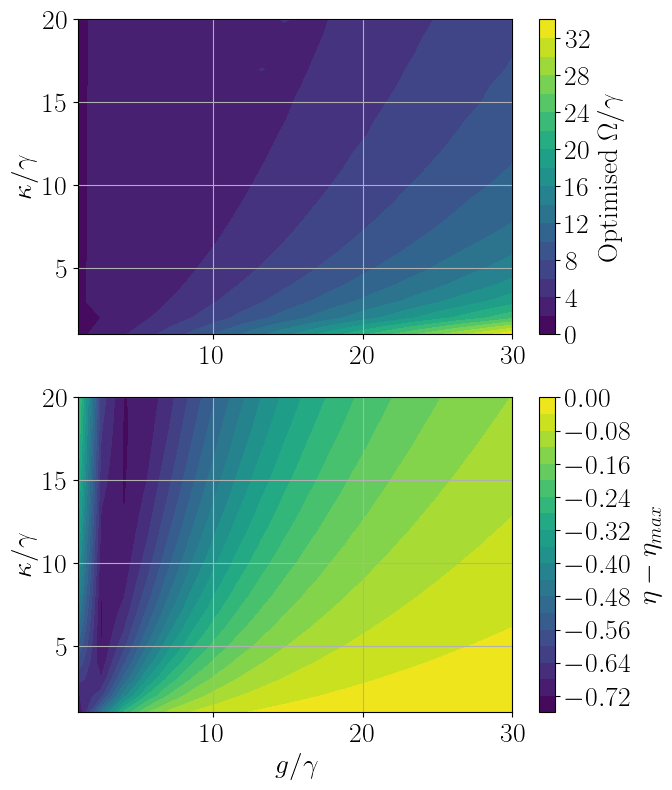

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))

con1 = axes[0].contourf(X,Y, omegas, levels=20)

#axes[0].set_xlabel('$g/\gamma$', fontsize=20)
axes[0].set_ylabel('$\kappa / \gamma$', fontsize=20)



axes[0].grid()
#axes[0].set_title('Optimised $\Omega / \gamma$', {'fontsize':20})
axes[0].tick_params(axis='both', which='major', labelsize=20)
cbar1=fig.colorbar(con1, ax=axes[0])
cbar1.ax.tick_params(labelsize=20)
cbar1.set_label('Optimised $\Omega / \gamma$', fontsize=20)

con2 = axes[1].contourf(X,Y, diff_effs, levels=20)

axes[1].set_xlabel('$g/\gamma$', fontsize=20)
axes[1].set_ylabel('$\kappa / \gamma$', fontsize=20)

axes[1].grid()
#axes[1].set_title('$\eta-\eta_{max}$', {'fontsize':20})
axes[1].tick_params(axis='both', which='major', labelsize=20)
cbar2=fig.colorbar(con2, ax=axes[1])
cbar2.ax.tick_params(labelsize=20)
cbar2.set_label('$\eta-\eta_{max}$', fontsize=20)

plt.show

plt.savefig("pdf_files/contourf_ideal_omega&diffs.pdf", bbox_inches='tight')

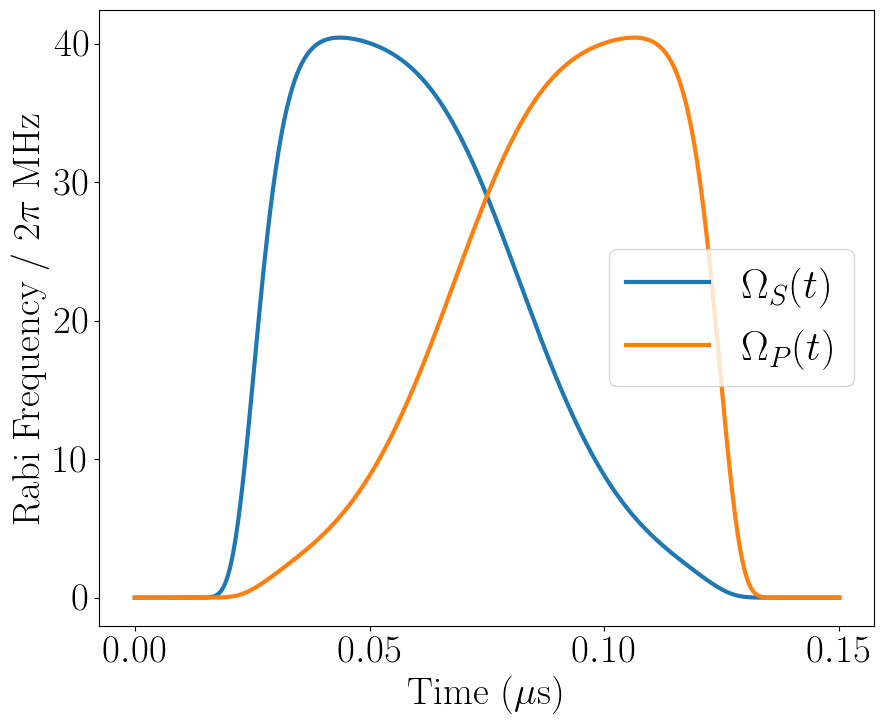

In [38]:
######For Coherent Repumping#####
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
#lengthRepump=0.3


CG_d1g2x1=0.57735026918962576451
CG_d1g1Mx1=-0.2886751345948129


#masked repumping pulse shapes
def f(a, t, T):
    return(1/(1 + np.exp((-a*(t - T/2))/T)))
def mask(n,c,t,T):
    return(np.exp(-((t - (T/2))/c)**(2*n)))

def omega_pump(A,a,n,c,t,T):
    return (A*np.exp(-((t - (T/2))/c)**(2*n))*np.sin(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))

def omega_stokes(A,a,n,c,t,T):
    return (A*np.exp(-((t - (T/2))/c)**(2*n))*np.cos(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))

def omega_pump_opt(A,a,t,T):
    return (A*np.sin(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))

def omega_stokes_opt(A,a,t,T):
    return (A*np.cos(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))

length=0.15
A=41
n=6
a=11
c=0.05
t = np.linspace(0, length, 1000)
[A2,A1] = [abs(x)*2*np.pi for x in [A,A]]

omega_s_print=[]
omega_p_print=[]
for x in t:
    omega_s_print.append(omega_stokes(A,a,n,c,x,length))
    omega_p_print.append(omega_pump(A,a,n,c,x,length))


f, (a1) = plt.subplots(1, 1, sharex=True, figsize=(10, 8))

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

a1.set_ylabel('Rabi Frequency / $2\pi$ MHz', fontsize=28)
a1.set_xlabel('Time ($\mu$s)', fontsize=28)
a1.tick_params(axis='x', labelsize=28)
a1.tick_params(axis='y', labelsize=28)
a1.plot(t, omega_s_print, label='$\Omega_S(t)$', linewidth=3)
a1.plot(t, omega_p_print, label='$\Omega_P(t)$',linewidth=3 )
a1.tick_params(axis='both', which='major', labelsize=28)
a1.legend(loc='best', fontsize=30)
f.savefig('pdf_files/repumpingpulses_d1_masked.pdf')

In [39]:
d1_file_name_list = ['data/csv data/contourfz_d1_maskedhyper_z.csv','data/csv data/contourfz_d1_maskedhyper_x.csv','data/csv data/contourfz_d1_maskedhyper_y.csv' ]
d2_file_name_list = ['data/csv data/contourfz_d2_maskedhyper_z.csv','data/csv data/contourfz_d2_maskedhyper_x.csv','data/csv data/contourfz_d2_maskedhyper_y.csv' ]

contourf_d1_data=[]
contourf_d2_data=[]

for file in d1_file_name_list:
    contourf_d1_data.append(pd.read_csv('{}'.format(file), header=None).values)

for file in d2_file_name_list:
    contourf_d2_data.append(pd.read_csv('{}'.format(file), header=None).values)

In [40]:
#Make contour plot for rempumping efficiencies for d1 d2 repumping with masked pulses
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

lengthRepumpList = [x for x in np.round(np.linspace(0.05,0.2868,19).tolist(),3)]

x_d2_data=np.ndarray.flatten(contourf_d2_data[1])
y_d2_data=np.ndarray.flatten(contourf_d2_data[2])

z_d2_data=contourf_d2_data[0]

x_d1_data=np.ndarray.flatten(contourf_d1_data[1])
y_d1_data=np.ndarray.flatten(contourf_d1_data[2])

z_d1_data=contourf_d1_data[0]


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


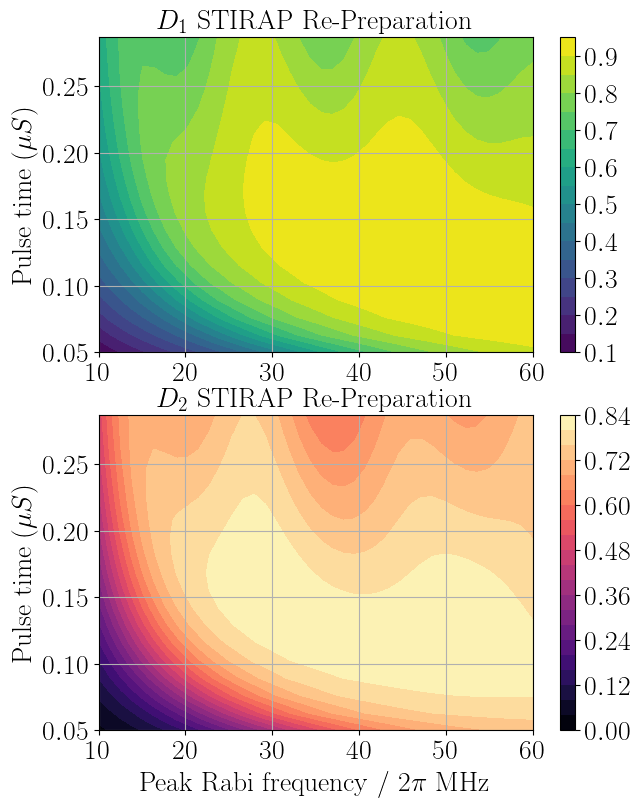

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))

contourlevles=np.linspace(0,1,21)

con1 = axes[0].contourf(x_d1_data,y_d1_data,z_d1_data, levels=20)

axes[0].set_ylabel('Pulse time $(\mu S)$', fontsize=20)

#axes[0].set_xlabel('Peak Rabi frequency /MHz')

axes[0].grid()
axes[0].set_title('$D_1$ STIRAP Re-Preparation', {'fontsize':20})
axes[0].tick_params(axis='both', which='major', labelsize=20)
cbar1=fig.colorbar(con1, ax=axes[0])
cbar1.ax.tick_params(labelsize=20)
con2 = axes[1].contourf(x_d2_data,y_d2_data,z_d2_data, levels=20, cmap='magma')

axes[1].set_ylabel('Pulse time $(\mu S)$', fontsize=20)

axes[1].set_xlabel('Peak Rabi frequency / $2\pi$ MHz', fontsize=20)

axes[1].grid()
axes[1].set_title('$D_2$ STIRAP Re-Preparation', {'fontsize':20})
axes[1].tick_params(axis='both', which='major', labelsize=20)
cbar2=fig.colorbar(con2, ax=axes[1])
cbar2.ax.tick_params(labelsize=20)

plt.show

plt.savefig("pdf_files/contourf_repumping_d1&d2_masked.pdf", bbox_inches='tight')